<a href="https://colab.research.google.com/github/Akshata-AB/Pycaret-evaluation/blob/main/Crime_Classification_Project_Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRIME CLASSIFICATION

> - Crime data is an important store of information that can be utilized by police & public to decrease crime rates. Police department can improve public safety standards using observations on patterns/trends of crime collected over time.
> - We are working on San Francisco Crime classification Data from Kaggle.
> - The dataset is a time-series dataset having observations collected from 2003 to 2015, with around 800k observations in training data set and around 800k observations in testing dataset.
> - It includes geographical and text data and contains years of criminal incidents which was collected from SF Police Department Crime Incident reporting system.
> - Our goal is to build a model to predict the most probable category of crime given the location and the time.

# INSTALL KAGGLE AND IMPORT DATA FROM KAGGLE

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhavnasjain","key":"e41915d9beeee6e1fd6f4c4dc5443ed2"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c 'sf-crime' -p /content/sample_data/Term_Project_Crime_Classification

 81% 33.0M/40.9M [00:00<00:00, 62.0MB/s]
100% 40.9M/40.9M [00:00<00:00, 69.6MB/s]


In [ ]:
! unzip '/content/sample_data/Term_Project_Crime_Classification/sf-crime.zip' -d /content/sample_data/Term_Project_Crime_Classification

Archive:  /content/sample_data/Term_Project_Crime_Classification/sf-crime.zip
  inflating: /content/sample_data/Term_Project_Crime_Classification/sampleSubmission.csv.zip  
  inflating: /content/sample_data/Term_Project_Crime_Classification/test.csv.zip  
  inflating: /content/sample_data/Term_Project_Crime_Classification/train.csv.zip  


In [ ]:
! unzip '/content/sample_data/Term_Project_Crime_Classification/train.csv.zip' -d /content/sample_data/Term_Project_Crime_Classification

Archive:  /content/sample_data/Term_Project_Crime_Classification/train.csv.zip
  inflating: /content/sample_data/Term_Project_Crime_Classification/train.csv  


In [ ]:
! unzip '/content/sample_data/Term_Project_Crime_Classification/test.csv.zip' -d /content/sample_data/Term_Project_Crime_Classification

Archive:  /content/sample_data/Term_Project_Crime_Classification/test.csv.zip
  inflating: /content/sample_data/Term_Project_Crime_Classification/test.csv  


# IMPORT LIBRARIES, READ TRAIN DATA AND PREPROCESS DATA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_train = pd.read_csv('/content/sample_data/Term_Project_Crime_Classification/train.csv')
df_train.shape

(878049, 9)

In [ ]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
df_train.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212


In [ ]:
#checking general information about the dataset-number of rows, datatypes of columns, null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


The dataset consists of 878,049 entires spread across 9 columns.
There are no null/missing values in the dataset.
We have 7 object columns, 2 numerical columns. We have a majority of Object columns which we will need to encode.

In [ ]:
#Getting column wise statistics of numerical columns
df_train.describe().T #T will transpose the column and row values

,count,mean,std,min,25%,50%,75%,max
X,878049.0,-122.422616,0.030354,-122.513642,-122.432952,-122.416420,-122.406959,-120.5
Y,878049.0,37.771020,0.456893,37.707879,37.752427,37.775421,37.784369,90.0


**Renaming a few columns for the purpose of better understanding of what they mean**

In [ ]:
df_train = df_train.rename(columns={'Descript': 'Description', 'PdDistrict': 'PoliceDeptDistrict', 'Resolution': 'CrimeResolutionStatus', 'X':'Longitude', 'Y':'Latitude'})

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Dates                  878049 non-null  object 
 1   Category               878049 non-null  object 
 2   Description            878049 non-null  object 
 3   DayOfWeek              878049 non-null  object 
 4   PoliceDeptDistrict     878049 non-null  object 
 5   CrimeResolutionStatus  878049 non-null  object 
 6   Address                878049 non-null  object 
 7   Longitude              878049 non-null  float64
 8   Latitude               878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


**EDA and Feature Engineering**

Exploring our dataset to undertand the distribution of our data, the type of variables, missing values, outliers in data, ranges of features etc to get an intuition on how to handle data.

In [ ]:
df1 = pd.read_csv('/content/sample_data/Term_Project_Crime_Classification/train.csv', parse_dates=['Dates'])
print('First Date in our Dataset: ', str(df1.Dates.describe()['first']))
print('Last Date in our Dataset: ', str(df1.Dates.describe()['last']))

First Date in our Dataset:  2003-01-06 00:01:00
Last Date in our Dataset:  2015-05-13 23:53:00


Our dataset contains crime reports collected from dates: **1/6/2003** to **5/13/2015**.

**Handling Null/Missing Values**

In [ ]:
#checking for null/ missing values
df_train.isna().sum()

Dates                    0
Category                 0
Description              0
DayOfWeek                0
PoliceDeptDistrict       0
CrimeResolutionStatus    0
Address                  0
Longitude                0
Latitude                 0
dtype: int64

Our dataset does not have any null/missing values.

**Checking for Duplicate records**

In [ ]:
#checking for duplicates in our dataset
df_train.duplicated().sum()

2323

In [ ]:
df_dup = df_train[df_train.duplicated()]
df_dup.head()

,Dates,Category,Description,DayOfWeek,PoliceDeptDistrict,CrimeResolutionStatus,Address,Longitude,Latitude
582,2015-05-12 11:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
1133,2015-05-03 23:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Sunday,CENTRAL,NONE,STOCKTON ST / NORTHPOINT ST,-122.410501,37.806963
1822,2015-05-02 02:30:00,ASSAULT,BATTERY,Saturday,PARK,NONE,1300 Block of MCALLISTER ST,-122.434257,37.778370
2109,2015-05-01 11:30:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,SOUTHERN,"ARREST, BOOKED",10TH ST / HARRISON ST,-122.411279,37.771579
3004,2015-04-29 10:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.466205,37.772541


In [ ]:
df_train = df_train.drop_duplicates()
df_train.shape

(875726, 9)

In [ ]:
df_train.duplicated().sum() #removed all duplicate records

0

**Detecting Outliers**

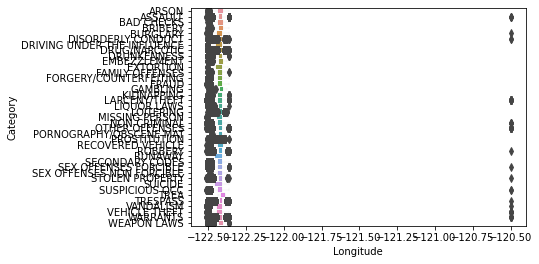

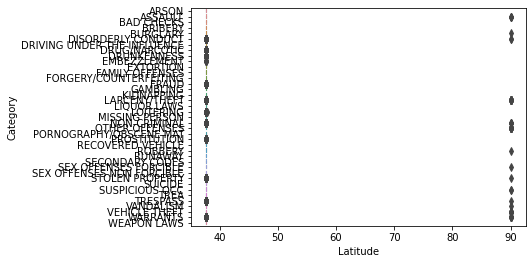

In [ ]:
num_cols = ['Longitude','Latitude']
for col in num_cols:
    sns.boxplot(y = df_train['Category'].astype('category'), x = col, data=df_train, linewidth=0.05)
    plt.show()

<AxesSubplot:>

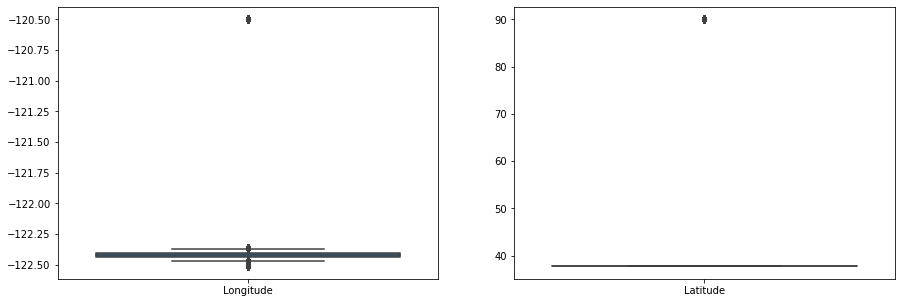

In [ ]:
#Checking for Outliers using subplots
figure, axs = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(data = df_train[["Longitude"]],ax=axs[0])
sns.boxplot(data = df_train[["Latitude"]],ax=axs[1])

In [ ]:
#getting outliers count
df_outs = df_train[(df_train["Longitude"] == -120.50) & (df_train["Latitude"] == 90)]
df_outs.shape
#df_outs.head()

(67, 9)

- San Francisco city Longitude ranges from -122.5136 to -122.3649.
- San Francisco city Latitude ranges from 37.70788 to 37.81998.
- From the 2 boxplots above we can see that there are outliers in co-ordinates where erroneous value of -120.5, 90 is entered for the Longitude and Latitude.  
- We have 67 such records with incorrect co-ordinates.
- This might be a human error since we cross verified the address corresponding to all these 67 outlier records, all addresses point to SF region only so they are valid rows, except to continue, we will have to replace the outlying co-ordinates with the average co-ordinates of the district they belong.

In [ ]:
#replacing outlier values with the mean co-ordinates of districts they belong to
#Using a simple imputer for this task- we are first replacing co-ordinate values having -120.5 and 90 with NaN and then imputing those values by finding the mean of district they belong to.
from sklearn.impute import SimpleImputer
df_train.replace({'Longitude': -120.5, 'Latitude': 90.0}, np.NaN, inplace=True)

imp = SimpleImputer(strategy='mean')
districts = df_train['PoliceDeptDistrict'].unique()

for district in districts:
    df_train.loc[df_train['PoliceDeptDistrict'] == district, ['Longitude', 'Latitude']] = imp.fit_transform(df_train.loc[df_train['PoliceDeptDistrict'] == district, ['Longitude', 'Latitude']])

In [ ]:
df_outs_rem = df_train[(df_train["Longitude"] == -120.50) & (df_train["Latitude"] == 90)]
df_outs_rem #all outliers imputed.

,Dates,Category,Description,DayOfWeek,PoliceDeptDistrict,CrimeResolutionStatus,Address,Longitude,Latitude


**Data Distribution in Target Column**

In [ ]:
#Finding uniques in target column
target_col = df_train["Category"].unique()
print(target_col)
print('\n Number of Unique Categories of Crimes are: ', len(target_col))

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']

 Number of Unique Categories of Crimes are:  39


We have a total of 878049 rows and there are 39 unique values in our target column. Looking at this we realise that our dataset is a multi-class problem and can be solved using classification models.

<AxesSubplot:>

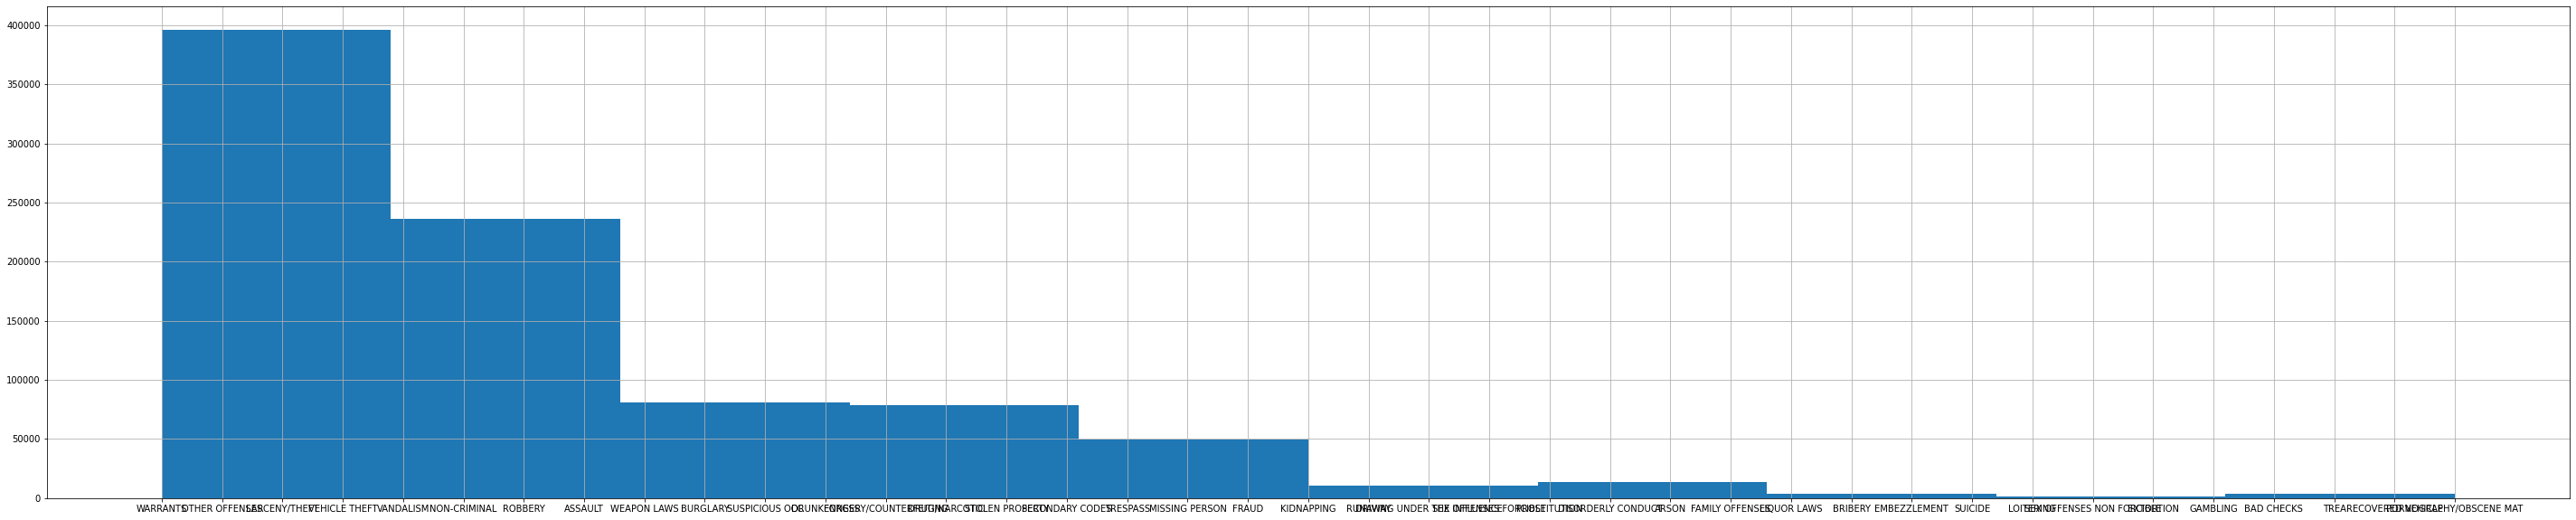

In [ ]:
df_train['Category'].hist(figsize=(50,10))

In [ ]:
df_train.Category.value_counts()

LARCENY/THEFT                  174320
OTHER OFFENSES                 125960
NON-CRIMINAL                    91915
ASSAULT                         76815
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53706
VANDALISM                       44581
WARRANTS                        42145
BURGLARY                        36600
SUSPICIOUS OCC                  31394
MISSING PERSON                  25669
ROBBERY                         22988
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7318
STOLEN PROPERTY                  4537
SEX OFFENSES FORCIBLE            4380
DISORDERLY CONDUCT               4313
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUNAWAY     

**Inference from Data Distribution in Target Column:**

- We see that there is an imbalance in data distribution, Warrants, Larceny/theft, Vehical theft occur more frequently than other crime categories in the dataset.
- Few categories like Suicide, bribery, extortion, gambling etc have fewer than 1000 records.
- From the above counts of records in each crime category, since we have very little training data for a few classes, if we train models on such data(limited data) then we might overfit data which will reduce prediction accuracy of unknown test data.
- In order to improve model's accuracy we are combinig a few categories based on similar description of crime and deleting a few categories that dont pertain to our goal to reduce categories.

**Collapsing Crime Categories:**

- Since we are only interested in criminal incidents that can affect location’s security and safety, the below categories of incidents are deleted from the dataset.
> - NON-CRIMINAL - Looking into the descriptions for these, we can see that these incidents report non-criminal reports, eg: death report, mental disturbed, Stay-away or court order, found property, aided cases etc.
> - OTHER OFFENSES - Description contains various crime incidents that are hard to label with the existing crime categories. eg: DL revoked, Harassing phone calls, conspiracy, parole violation, parkcode violation.
> - RECOVERED VEHICLE - This category tells us about vehicles recovered that were stolen outside of SF. This is more of a resolution than a crime, predicting this doesnt add much value to our goal.
- We realized that several crime categories were similar to one another based on description, and could therefore be collapsed into smaller classes for better prediction.
- All categories consisting of records fewer than 2000 are collapsed into a new category called MISCELLANEOUS. 14 such categories are collapsed into 1.
- Categories that were combined into a single class:
> - DRUNKENNESS & DRIVING UNDER THE INFLUENCE = DUI
> - FRAUD & FORGERY/COUNTERFEITING = FRAUD-FORGERY
> - KIDNAPPING & MISSING PERSON = MISSING PERSON
> - PROSTITUTION & SEX OFFENSES FORCIBLE = SEX OFFENSES
- After all Crime Category collapses we will end up with 19 distict categories to perform predictions on.

In [ ]:
df_newCats = df_train.copy() # Creating a copy of our df before Target category manipulation

In [ ]:
df_train.shape

(875726, 9)

In [ ]:
df_newCats.shape

(875726, 9)

In [ ]:
#Defining a custom function and using .apply function to collapse class labels and assign new class names
def assign_new_class(row):
  new_class = ''
  if row == 'DRUNKENNESS' or row == 'DRIVING UNDER THE INFLUENCE':
    new_class = 'DUI'
  elif row == 'FRAUD' or row == 'FORGERY/COUNTERFEITING':
    new_class = 'FRAUD-FORGERY'
  elif row == 'KIDNAPPING' or row == 'MISSING PERSON':
    new_class = 'MISSING PERSON'
  elif row == 'PROSTITUTION' or row == 'SEX OFFENSES FORCIBLE':
    new_class = 'SEX OFFENSES'
  elif row in ['LIQUOR LAWS','RUNAWAY','ARSON','LOITERING','EMBEZZLEMENT','SUICIDE','FAMILY OFFENSES','BAD CHECKS','BRIBERY','EXTORTION','SEX OFFENSES NON FORCIBLE','GAMBLING','PORNOGRAPHY/OBSCENE MAT','TREA' ]:
    new_class = 'MISCELLANEOUS'
  else:
    new_class = row
  return new_class

df_newCats['Category'] = df_newCats['Category'].apply(assign_new_class)

In [ ]:
df_newCats.Category.value_counts()

LARCENY/THEFT         174320
OTHER OFFENSES        125960
NON-CRIMINAL           91915
ASSAULT                76815
DRUG/NARCOTIC          53919
VEHICLE THEFT          53706
VANDALISM              44581
WARRANTS               42145
BURGLARY               36600
SUSPICIOUS OCC         31394
MISSING PERSON         28009
FRAUD-FORGERY          27229
ROBBERY                22988
SEX OFFENSES           11826
SECONDARY CODES         9979
MISCELLANEOUS           9945
WEAPON LAWS             8550
TRESPASS                7318
DUI                     6545
STOLEN PROPERTY         4537
DISORDERLY CONDUCT      4313
RECOVERED VEHICLE       3132
Name: Category, dtype: int64

In [ ]:
df_newCats.Category.nunique()

22

In [ ]:
df_train = df_newCats.copy() # Copy back to original dataframe

In [ ]:
#Dropping all samples that are classified as 'NON-CRIMINAL' category of crime
non_criminal = df_train[df_train["Category"] == "NON-CRIMINAL"]
non_criminal.shape #there are 91915 records that belong to 'non-criminal'

(91915, 9)

In [ ]:
df_train.shape #count before dropping 'Non_criminal' records

(875726, 9)

In [ ]:
df_train = df_train.drop(df_train[df_train.Category == 'NON-CRIMINAL'].index)
df_train.shape

(783811, 9)

In [ ]:
#Dropping all samples that are classified as 'OTHER OFFENSES' category of crime
other_offense = df_train[df_train["Category"] == "OTHER OFFENSES"]
other_offense.shape #there are 125960 records that belong to 'OTHER OFFENSES'

(125960, 9)

In [ ]:
df_train.shape #count before dropping 'other offense' records

(783811, 9)

In [ ]:
df_train = df_train.drop(df_train[df_train.Category == 'OTHER OFFENSES'].index)
df_train.shape

(657851, 9)

In [ ]:
#Dropping all samples that are classified as 'Recovered Vehicle' category of crime
rec_vehi = df_train[df_train["Category"] == "RECOVERED VEHICLE"]
rec_vehi.shape #there are 3132 records that belong to 'RECOVERED VEHICLE'

(3132, 9)

In [ ]:
df_train.shape #count before dropping 'recovered vehicle' records

(657851, 9)

In [ ]:
df_train = df_train.drop(df_train[df_train.Category == 'RECOVERED VEHICLE'].index)
df_train.shape

(654719, 9)

In [ ]:
df_train.Category.nunique()

19

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654719 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Dates                  654719 non-null  object 
 1   Category               654719 non-null  object 
 2   Description            654719 non-null  object 
 3   DayOfWeek              654719 non-null  object 
 4   PoliceDeptDistrict     654719 non-null  object 
 5   CrimeResolutionStatus  654719 non-null  object 
 6   Address                654719 non-null  object 
 7   Longitude              654719 non-null  float64
 8   Latitude               654719 non-null  float64
dtypes: float64(2), object(7)
memory usage: 50.0+ MB


**Removing Unwanted Columns**

- From looking at the dataset and intuition, we can drop column **Description** which is the elaborative description of what each category refers, the kind of crimes coming undere each class in **Category** column.
- We can drop column **CrimeResolutionStatus** which tells how the reported crime incident is resolved.
- **Address** column can be dropped since its a textual representation of location of crime, we have the latitude and longitude values of each address which give us the numeric representation of the location.
- For further confirmation we encoded these columns to numerical values and checked their correlation with the target column to determine if dropping them makes sense.

In [ ]:
df_train['Category2'] = df_train['Category']#creating a copy of Target column which we will use to encode, the original column is used for data visualization
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654719 entries, 0 to 878048
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Dates                  654719 non-null  object 
 1   Category               654719 non-null  object 
 2   Description            654719 non-null  object 
 3   DayOfWeek              654719 non-null  object 
 4   PoliceDeptDistrict     654719 non-null  object 
 5   CrimeResolutionStatus  654719 non-null  object 
 6   Address                654719 non-null  object 
 7   Longitude              654719 non-null  float64
 8   Latitude               654719 non-null  float64
 9   Category2              654719 non-null  object 
dtypes: float64(2), object(8)
memory usage: 54.9+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
df2 = df_train
unwanted_cols = df2[['CrimeResolutionStatus','Description','Address','Category2']]
le = LabelEncoder()
for col in unwanted_cols:
    df2[col] = le.fit_transform(df2[col])

<AxesSubplot:>

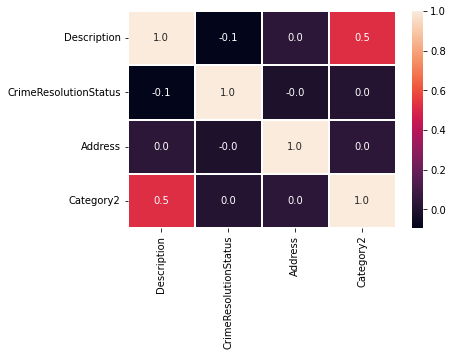

In [ ]:
df3 = df2[['Description','CrimeResolutionStatus','Address', 'Category2']]
sns.heatmap(df3.corr(), annot=True, fmt=".1f", linewidths=.2)

From the correlation heatmap we notice that the 2 columns have a low correlation with the target. **CrimeResolutionStatus** and **Address** have 0 correlation with target. Description has a 0.5 correlation, but it only describes category.
Hence we can conclude that these columns are not useful for our predictions and we can drop them.

In [ ]:
#dropping unwanted columns
df_train_copy = df_train.copy() #creating a copy since we might need full dataset for visualization or analysis later on
df_train = df_train.drop(['Description','CrimeResolutionStatus','Address','Category2'], axis=1)
df_train.shape

(654719, 6)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654719 entries, 0 to 878048
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Dates               654719 non-null  object 
 1   Category            654719 non-null  object 
 2   DayOfWeek           654719 non-null  object 
 3   PoliceDeptDistrict  654719 non-null  object 
 4   Longitude           654719 non-null  float64
 5   Latitude            654719 non-null  float64
dtypes: float64(2), object(4)
memory usage: 35.0+ MB


In [ ]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654719 entries, 0 to 878048
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Dates                  654719 non-null  object 
 1   Category               654719 non-null  object 
 2   Description            654719 non-null  int64  
 3   DayOfWeek              654719 non-null  object 
 4   PoliceDeptDistrict     654719 non-null  object 
 5   CrimeResolutionStatus  654719 non-null  int64  
 6   Address                654719 non-null  int64  
 7   Longitude              654719 non-null  float64
 8   Latitude               654719 non-null  float64
 9   Category2              654719 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 54.9+ MB


**DATA TRANSFORMATIONS, FEATURE EXTRACTION AND DATA VIZUALIZATION**

- We are transforming the data by exploding(splitting) data within columns: From the **Dates** column we are extracting information on year, month, day, hour, min, holiday, weekend etc which are the new features of dataset.

- We are vizualising data using various maps and plots to see how the data distribution of target(Crime Category) is for differnt feature columns.

We are trying to answer the following questions:
1. How are crimes spread across the day, differnt days of week, months and years?
2. How is the crime rate on holidays and weekends?
2. What is the crime rate and crime type frequency across various Police Department Districts in San Francisco?
3. Within the target column which are the crimes that are most prevelant(occur mostly)?

In [ ]:
type(df_train['Dates'])

pandas.core.series.Series

In [ ]:
#Exploding the Dates column to extract year, month and day
dates = pd.to_datetime(df_train["Dates"])
#df_train['Dates'] = pd.to_datetime(df_train['Dates'])
df_train['Year'] = dates.dt.year
df_train['Month'] = dates.dt.month
df_train['Day'] = dates.dt.day
df_train['Hour'] = dates.dt.hour
df_train['Minute'] = dates.dt.minute
df_train.head()

,Dates,Category,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,2015,5,13,23,53
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,2015,5,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,2015,5,13,23,30
5,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,INGLESIDE,-122.403252,37.713431,2015,5,13,23,30
6,2015-05-13 23:30:00,VEHICLE THEFT,Wednesday,INGLESIDE,-122.423327,37.725138,2015,5,13,23,30


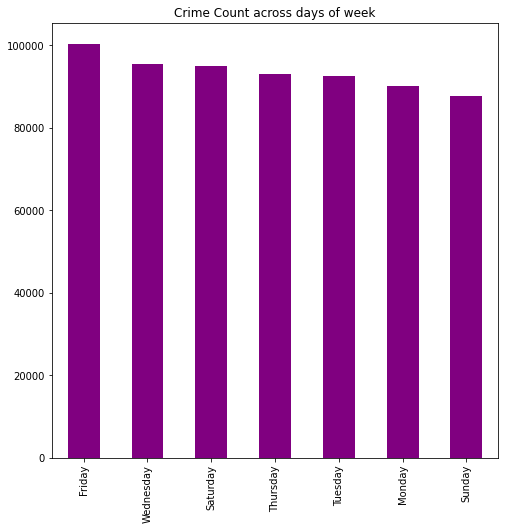

In [ ]:
df_train['DayOfWeek'].value_counts().plot(kind='bar', figsize=(8,8), color='purple')
plt.title('Crime Count across days of week')
plt.show()

From the bar plot we can infer that crime rates are highest on Friday and lowest on Sundays.

In [ ]:
def weekend(weekday):
    return weekday == "Saturday" or weekday == "Sunday"

df_train["Weekend"] = df_train["DayOfWeek"].map(weekend)

In [ ]:
df_train[df_train['Weekend']==True]

,Dates,Category,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute,Weekend
1118,2015-05-03 23:46:00,ASSAULT,Sunday,SOUTHERN,-122.399834,37.781043,2015,5,3,23,46,True
1119,2015-05-03 23:46:00,ASSAULT,Sunday,SOUTHERN,-122.399834,37.781043,2015,5,3,23,46,True
1120,2015-05-03 23:46:00,VANDALISM,Sunday,SOUTHERN,-122.399834,37.781043,2015,5,3,23,46,True
1121,2015-05-03 23:35:00,WEAPON LAWS,Sunday,BAYVIEW,-122.379214,37.732369,2015,5,3,23,35,True
1122,2015-05-03 23:20:00,ASSAULT,Sunday,NORTHERN,-122.443896,37.800854,2015,5,3,23,20,True
...,...,...,...,...,...,...,...,...,...,...,...,...
875879,2003-01-11 00:05:00,VANDALISM,Saturday,SOUTHERN,-122.397815,37.782137,2003,1,11,0,5,True
875881,2003-01-11 00:01:00,DRUG/NARCOTIC,Saturday,SOUTHERN,-122.420755,37.772018,2003,1,11,0,1,True
875882,2003-01-11 00:01:00,LARCENY/THEFT,Saturday,PARK,-122.435376,37.771479,2003,1,11,0,1,True
875885,2003-01-11 00:01:00,TRESPASS,Saturday,CENTRAL,-122.405991,37.801722,2003,1,11,0,1,True


In [ ]:
#We can drop the Dates column since we split it into Year-Month-Day-Time
df_train = df_train.drop(['Dates'], axis=1)
df_train.shape

(654719, 11)

In [ ]:
#Police Department Districts
df_train['PoliceDeptDistrict'].value_counts()
type(df_train['PoliceDeptDistrict'].value_counts())
df_crime = df_train['PoliceDeptDistrict'].value_counts().reset_index()
df_crime.columns = ['Neighbourhood', 'Count']
df_crime

,Neighbourhood,Count
0,SOUTHERN,115409
1,MISSION,87748
2,NORTHERN,82401
3,CENTRAL,65273
4,BAYVIEW,65253
5,TENDERLOIN,60387
6,INGLESIDE,58038
7,TARAVAL,49629
8,PARK,36978
9,RICHMOND,33603


In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
geojson = r'https://cocl.us/sanfran_geojson'
latitude = 37.77
longitude = -122.42
SF_map = folium.Map(location=[latitude, longitude], zoom_start=12)
SF_map.choropleth(
    geo_data=geojson,
    data=df_crime,
    columns=['Neighbourhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate In San Francisco')
SF_map

# REFERENCE USED FOR BUILDING THIS MAP: https://www.dominodatalab.com/blog/creating-interactive-crime-maps-with-folium

/bin/bash: conda: command not found


From the red regions in the map we can infer that the crime rate is mostly concentrated in these regions **Treasure Island** and in the **Southern**.
The gradual lighter shaded regions in yellow and orange indicate lesser crime rates.

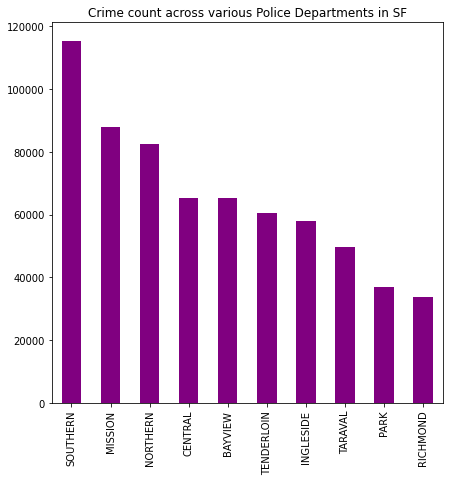

In [ ]:
df_train['PoliceDeptDistrict'].value_counts().plot(kind = 'bar',color='purple', figsize = (7,7))
plt.title('Crime count across various Police Departments in SF')
plt.show()

- From the above Bar plot we see that the Southern District has the most number of crimes reported where as the Richmond District has the least.
- Among the crime counts in each of the Police Dept districts, the different Categories of Crime(Frequency of each crime category in each district) is shown in the graph below.

In [ ]:
#Using the copy of Dataframe we had created earlier for further analysis
df_train_copy.groupby(['PoliceDeptDistrict','Category']).agg({'CrimeResolutionStatus':'count'}).pivot_table(index='Category',columns='PoliceDeptDistrict')['CrimeResolutionStatus']

PoliceDeptDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ASSAULT,9845,6971,8522,11146,8312,3512,3198,12175,5460,7674
BURGLARY,3914,4499,3327,3736,5827,2875,2683,4796,3459,1484
DISORDERLY CONDUCT,218,494,171,1097,450,270,108,510,162,833
DRUG/NARCOTIC,4496,1805,2372,8750,4508,2570,999,9222,1529,17668
DUI,422,677,396,1139,628,549,467,1265,460,542
FRAUD-FORGERY,1638,3478,2190,3242,3345,1490,1753,5756,2645,1692
LARCENY/THEFT,10075,24973,10207,18201,28566,9118,9845,41660,11807,9868
MISCELLANEOUS,1186,796,827,1653,884,839,470,1651,967,672
MISSING PERSON,5188,1541,3518,3582,2179,2793,1286,3365,3513,1044


<AxesSubplot:title={'center':'Crime Category Split in each district'}, xlabel='PoliceDeptDistrict'>

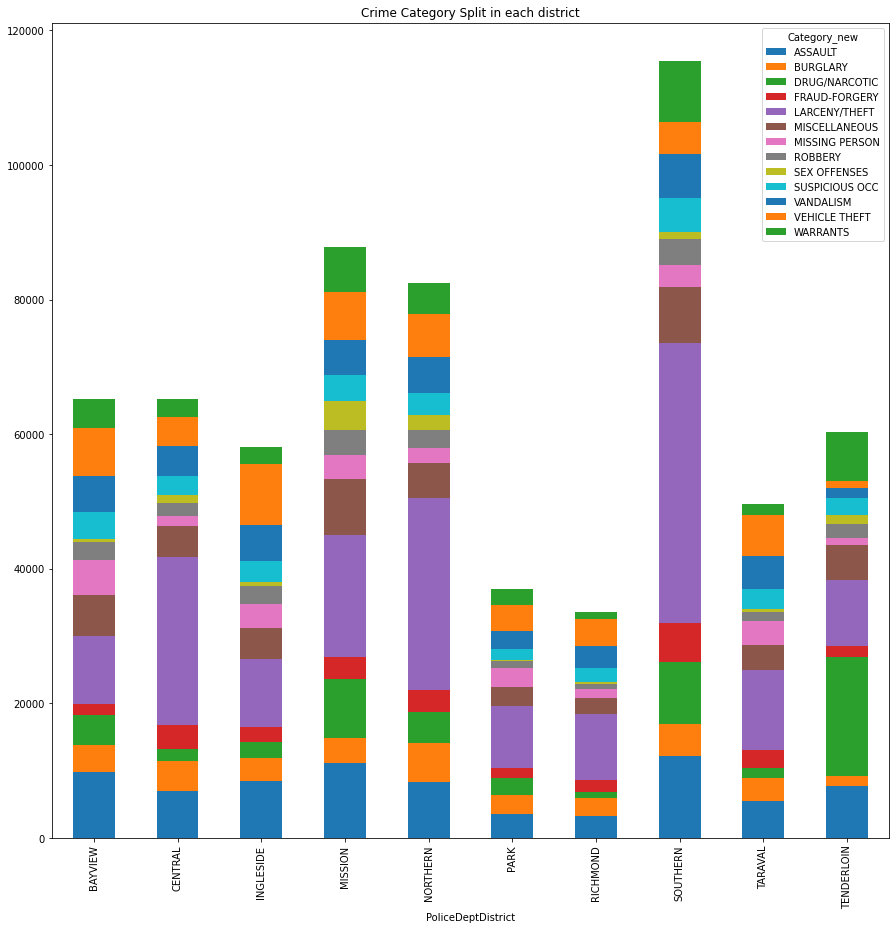

In [ ]:
cat2 = df_train_copy['Category'].value_counts()[df_train_copy['Category'].value_counts() > 10000].index
df_train_copy['Category_new']=df_train_copy['Category'].apply(lambda x: 'MISCELLANEOUS' if x not in cat2 else x)
df_train_copy['Category_new'].unique()

df_train_copy.groupby(['PoliceDeptDistrict','Category_new']).agg({'CrimeResolutionStatus':'count'}).pivot_table(index='PoliceDeptDistrict',columns='Category_new')['CrimeResolutionStatus'].plot(kind='bar',stacked=True,figsize=(15,15),title='Crime Category Split in each district')

We see that in the Southern District and Richmond District, Larceny/Theft is the most occuring crime.

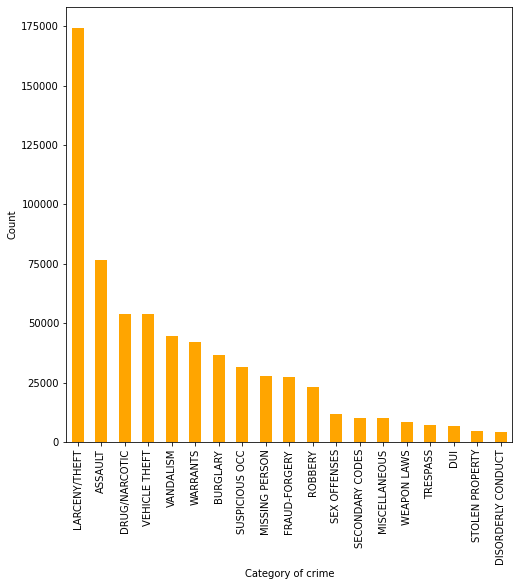

In [ ]:
#Most commonly occuring crimes among all categories of crimes
df_train['Category'].value_counts().plot(kind='bar', figsize=(8,8), color='orange')
plt.xlabel('Category of crime')
plt.ylabel('Count')
plt.show()

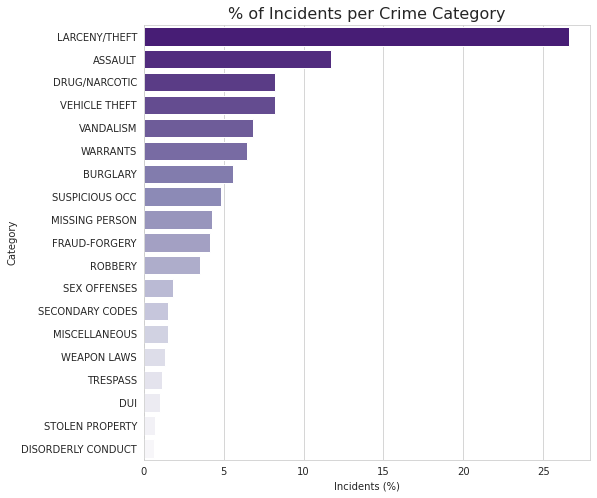

In [ ]:
data = df_train.groupby('Category').count().iloc[:, 0].sort_values(ascending=False)

plt.figure(figsize=(8, 8))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        (data.values / data.values.sum()) * 100,
        data.index,
        orient='h',
        palette="Purples_r")

plt.title('% of Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

plt.show()

From the above 2 graphs we see that Larceny/theft, Assault, Drug/Narcotic, Vehicle theft, Vandalism are some of the top crimes in SF.

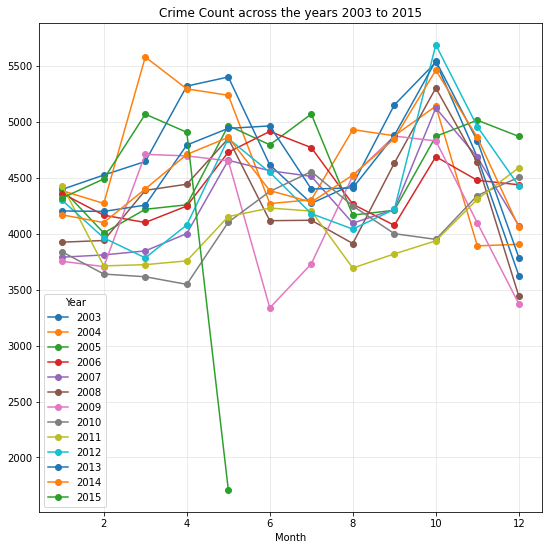

In [ ]:
plot_data = df_train.groupby(['Year','Month']).agg({'Category':'count'}).pivot_table(index='Month',columns='Year')['Category']
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
x = plot_data.index
for col in plot_data.columns:
    y = plot_data[col]
    ax.plot(x,y,'o-',label=col)
ax.legend(title='Year')
ax.grid('both',alpha=0.3)
ax.set_title('Crime Count across the years 2003 to 2015')
ax.set_xlabel('Month')
plt.show()

- In the above graph we see a sharp downward spike which ends at the 5th month of the year--> this line refers to data collected in the year 2015. We only have data up until the 5th month of 2015.
- We notice the crime rates across the year rise during months August to October. This may be owing to Halloween during October
- Januray months across the years see the lowest crimes.

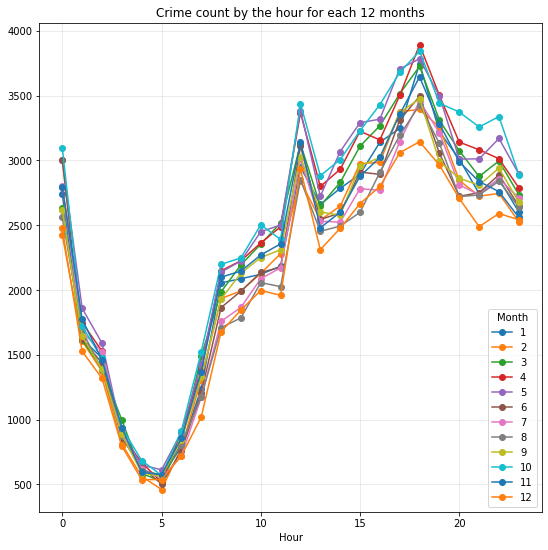

In [ ]:
plot_data = df_train.groupby(['Month','Hour']).agg({'Category':'count'}).pivot_table(index='Hour',columns='Month')['Category']
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
x = plot_data.index
for col in plot_data.columns:
    y = plot_data[col]
    ax.plot(x,y,'o-',label=col)
ax.legend(title='Month')
ax.grid('both',alpha=0.3)
ax.set_title('Crime count by the hour for each 12 months')
ax.set_xlabel('Hour')
plt.show()

We can infer from the above graph that crime counts during all the months are lowest during the early hours of the day- Morning 5AM and peak during noon 12pm and evening time 5-6pm.

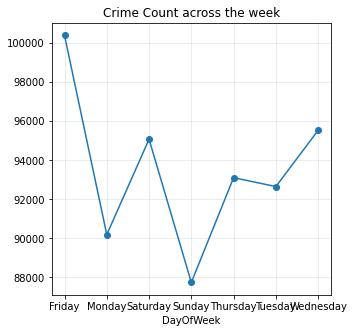

In [ ]:
plot_data = df_train.groupby(['DayOfWeek']).agg({'Category':'count'})
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
x = plot_data.index
for col in plot_data.columns:
    y = plot_data[col]
    ax.plot(x,y,'o-',label=col)
ax.grid('both',alpha=0.3)
ax.set_xlabel('DayOfWeek')
ax.set_title('Crime Count across the week')
plt.show()

We see that crimes are at a peak during the start of the weekend(Friday) whereas its the least towards the end of the weekend(Sunday).

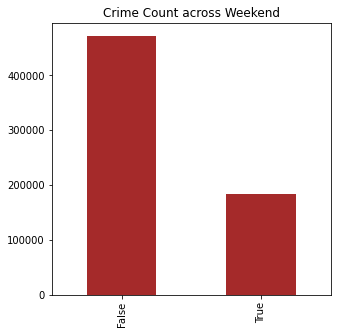

In [ ]:
df_train['Weekend'].value_counts().plot(kind='bar', figsize=(5,5), color='brown')
plt.title('Crime Count across Weekend')
plt.show()

True denotes Weekends and False denotes Weekdays, we can see that Crime rates are lower during weekends compared to weekdays. This is probable since weekends most people are out travelling or prefer to stay at home, public appearence in usual regions is reduced.

Mapping Object columns to numbers and creating a new feature for future reference.

In [ ]:
#Mapping Days of the week
daynumber = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
df_train['DayOfWeek_Map'] = df_train['DayOfWeek'].map(daynumber)
df_train.head()

,Category,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute,Weekend,DayOfWeek_Map
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,2015,5,13,23,53,False,3
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,2015,5,13,23,30,False,3
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,2015,5,13,23,30,False,3
5,LARCENY/THEFT,Wednesday,INGLESIDE,-122.403252,37.713431,2015,5,13,23,30,False,3
6,VEHICLE THEFT,Wednesday,INGLESIDE,-122.423327,37.725138,2015,5,13,23,30,False,3


In [ ]:
df_train['PoliceDeptDistrict'].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TENDERLOIN', 'TARAVAL', 'SOUTHERN', 'MISSION'], dtype=object)

In [ ]:
#Mapping Police Department Districts
distnumber = {'NORTHERN':1,'PARK':2,'INGLESIDE':3,'BAYVIEW':4,'RICHMOND':5,'CENTRAL':6,'TENDERLOIN':7,'TARAVAL':8,'SOUTHERN':9,'MISSION':10}
df_train['PoliceDeptDistrict_Map'] = df_train['PoliceDeptDistrict'].map(distnumber)
df_train.head()

,Category,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute,Weekend,DayOfWeek_Map,PoliceDeptDistrict_Map
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,2015,5,13,23,53,False,3,1
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,2015,5,13,23,30,False,3,1
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,2015,5,13,23,30,False,3,2
5,LARCENY/THEFT,Wednesday,INGLESIDE,-122.403252,37.713431,2015,5,13,23,30,False,3,3
6,VEHICLE THEFT,Wednesday,INGLESIDE,-122.423327,37.725138,2015,5,13,23,30,False,3,3


In [ ]:
df_train['Category'].value_counts()

LARCENY/THEFT         174320
ASSAULT                76815
DRUG/NARCOTIC          53919
VEHICLE THEFT          53706
VANDALISM              44581
WARRANTS               42145
BURGLARY               36600
SUSPICIOUS OCC         31394
MISSING PERSON         28009
FRAUD-FORGERY          27229
ROBBERY                22988
SEX OFFENSES           11826
SECONDARY CODES         9979
MISCELLANEOUS           9945
WEAPON LAWS             8550
TRESPASS                7318
DUI                     6545
STOLEN PROPERTY         4537
DISORDERLY CONDUCT      4313
Name: Category, dtype: int64

In [ ]:
#Mapping Crime Categories
crimenumber = {'LARCENY/THEFT':1,'ASSAULT':2,'DRUG/NARCOTIC':3,'VEHICLE THEFT':4,'VANDALISM':5,'WARRANTS':6,'BURGLARY':7, 'SUSPICIOUS OCC':8, 'MISSING PERSON':8,'FRAUD-FORGERY':10,
             'ROBBERY':11,'SEX OFFENSES':12,'SECONDARY CODES':13,'MISCELLANEOUS':14,'WEAPON LAWS':15,'TRESPASS':16,'DUI':17,'STOLEN PROPERTY':18,'DISORDERLY CONDUCT':19}
df_train['Category_Map'] = df_train['Category'].map(crimenumber)
df_train.head()

,Category,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute,Weekend,DayOfWeek_Map,PoliceDeptDistrict_Map,Category_Map
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,2015,5,13,23,53,False,3,1,6
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,2015,5,13,23,30,False,3,1,1
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,2015,5,13,23,30,False,3,2,1
5,LARCENY/THEFT,Wednesday,INGLESIDE,-122.403252,37.713431,2015,5,13,23,30,False,3,3,1
6,VEHICLE THEFT,Wednesday,INGLESIDE,-122.423327,37.725138,2015,5,13,23,30,False,3,3,4


In [ ]:
df_train_mapped = df_train.copy()

In [ ]:
df_train_mapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654719 entries, 0 to 878048
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Category                654719 non-null  object 
 1   DayOfWeek               654719 non-null  object 
 2   PoliceDeptDistrict      654719 non-null  object 
 3   Longitude               654719 non-null  float64
 4   Latitude                654719 non-null  float64
 5   Year                    654719 non-null  int64  
 6   Month                   654719 non-null  int64  
 7   Day                     654719 non-null  int64  
 8   Hour                    654719 non-null  int64  
 9   Minute                  654719 non-null  int64  
 10  Weekend                 654719 non-null  bool   
 11  DayOfWeek_Map           654719 non-null  int64  
 12  PoliceDeptDistrict_Map  654719 non-null  int64  
 13  Category_Map            654719 non-null  int64  
dtypes: bool(1), float64(

In [ ]:
df_train = df_train.drop(['DayOfWeek_Map','PoliceDeptDistrict_Map','Category_Map'], axis=1)
df_train.shape

(654719, 11)

**Feature Encoding:**

We have seen that our dataset has many object columns which need to be encoded to a format the computer can understand- here we are doing a label encoding on the object variables.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654719 entries, 0 to 878048
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Category            654719 non-null  object 
 1   DayOfWeek           654719 non-null  object 
 2   PoliceDeptDistrict  654719 non-null  object 
 3   Longitude           654719 non-null  float64
 4   Latitude            654719 non-null  float64
 5   Year                654719 non-null  int64  
 6   Month               654719 non-null  int64  
 7   Day                 654719 non-null  int64  
 8   Hour                654719 non-null  int64  
 9   Minute              654719 non-null  int64  
 10  Weekend             654719 non-null  bool   
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 55.6+ MB


In [ ]:
df_train.head()

,Category,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute,Weekend
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,2015,5,13,23,53,False
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,2015,5,13,23,30,False
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,2015,5,13,23,30,False
5,LARCENY/THEFT,Wednesday,INGLESIDE,-122.403252,37.713431,2015,5,13,23,30,False
6,VEHICLE THEFT,Wednesday,INGLESIDE,-122.423327,37.725138,2015,5,13,23,30,False


In [ ]:
categorical_cols_enc = ['DayOfWeek','PoliceDeptDistrict']
df_train[categorical_cols_enc] = df_train[categorical_cols_enc].apply(le.fit_transform)
df_train

,Category,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute,Weekend
0,WARRANTS,6,4,-122.425892,37.774599,2015,5,13,23,53,False
3,LARCENY/THEFT,6,4,-122.426995,37.800873,2015,5,13,23,30,False
4,LARCENY/THEFT,6,5,-122.438738,37.771541,2015,5,13,23,30,False
5,LARCENY/THEFT,6,2,-122.403252,37.713431,2015,5,13,23,30,False
6,VEHICLE THEFT,6,2,-122.423327,37.725138,2015,5,13,23,30,False
...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,1,8,-122.459033,37.714056,2003,1,6,0,15,False
878045,LARCENY/THEFT,1,2,-122.447364,37.731948,2003,1,6,0,1,False
878046,LARCENY/THEFT,1,7,-122.403390,37.780266,2003,1,6,0,1,False
878047,VANDALISM,1,7,-122.390531,37.780607,2003,1,6,0,1,False


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,654719.0,2.982217,2.024281,0.000000,1.000000,3.000000,5.000000,6.000000
PoliceDeptDistrict,654719.0,4.443254,2.854988,0.000000,2.000000,4.000000,7.000000,9.000000
Longitude,654719.0,-122.422898,0.025322,-122.513642,-122.433075,-122.416578,-122.407018,-122.364937
Latitude,654719.0,37.767324,0.024207,37.707879,37.752879,37.775421,37.784697,37.819975
Year,654719.0,2008.646436,3.640870,2003.000000,2005.000000,2009.000000,2012.000000,2015.000000
Month,654719.0,6.457237,3.428796,1.000000,4.000000,6.000000,10.000000,12.000000
Day,654719.0,15.623060,8.773443,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,654719.0,13.524671,6.594134,0.000000,9.000000,15.000000,19.000000,23.000000
Minute,654719.0,19.431845,18.484301,0.000000,0.000000,16.000000,30.000000,59.000000


**Scaling Features: Standardization of Variable Ranges**:

As seen from the column wise summary statistics, ranges of variables differ from one another, min and max value within a column is off compared to mean of column hence we normalise all data.


**Feature selection** - Choosing important features that impact our prediction and scaling them.

In [ ]:
#selecting features
feature_colums = ['DayOfWeek','PoliceDeptDistrict','Longitude','Latitude','Year','Month','Day','Hour']
X = df_train[feature_colums]
X.shape

(654719, 8)

In [ ]:
#Selecting target column
y = df_train[['Category']]
y.shape

(654719, 1)

In [ ]:
X

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour
0,6,4,-122.425892,37.774599,2015,5,13,23
3,6,4,-122.426995,37.800873,2015,5,13,23
4,6,5,-122.438738,37.771541,2015,5,13,23
5,6,2,-122.403252,37.713431,2015,5,13,23
6,6,2,-122.423327,37.725138,2015,5,13,23
...,...,...,...,...,...,...,...,...
878044,1,8,-122.459033,37.714056,2003,1,6,0
878045,1,2,-122.447364,37.731948,2003,1,6,0
878046,1,7,-122.403390,37.780266,2003,1,6,0
878047,1,7,-122.390531,37.780607,2003,1,6,0


In [ ]:
y

,Category
0,WARRANTS
3,LARCENY/THEFT
4,LARCENY/THEFT
5,LARCENY/THEFT
6,VEHICLE THEFT
...,...
878044,ROBBERY
878045,LARCENY/THEFT
878046,LARCENY/THEFT
878047,VANDALISM


In [ ]:
# Normalizing the feature variables - X needs to be scaled
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
from sklearn.preprocessing import MinMaxScaler
df_train_scaled = MinMaxScaler().fit_transform(X)
df_train_scaled = pd.DataFrame(df_train_scaled, columns = list(X))
df_train_scaled

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour
0,1.000000,0.444444,0.590099,0.595198,1.0,0.363636,0.400000,1.0
1,1.000000,0.444444,0.582677,0.829586,1.0,0.363636,0.400000,1.0
2,1.000000,0.555556,0.503713,0.567923,1.0,0.363636,0.400000,1.0
3,1.000000,0.222222,0.742342,0.049526,1.0,0.363636,0.400000,1.0
4,1.000000,0.222222,0.607346,0.153966,1.0,0.363636,0.400000,1.0
...,...,...,...,...,...,...,...,...
654714,0.166667,0.888889,0.367231,0.055107,0.0,0.000000,0.166667,0.0
654715,0.166667,0.222222,0.445706,0.214713,0.0,0.000000,0.166667,0.0
654716,0.166667,0.777778,0.741414,0.645752,0.0,0.000000,0.166667,0.0
654717,0.166667,0.777778,0.827888,0.648799,0.0,0.000000,0.166667,0.0


In [ ]:
df_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,654719.0,0.497036,0.337380,0.0,0.166667,0.500000,0.833333,1.0
PoliceDeptDistrict,654719.0,0.493695,0.317221,0.0,0.222222,0.444444,0.777778,1.0
Longitude,654719.0,0.610230,0.170281,0.0,0.541792,0.652728,0.717017,1.0
Latitude,654719.0,0.530299,0.215948,0.0,0.401438,0.602532,0.685284,1.0
Year,654719.0,0.470536,0.303406,0.0,0.166667,0.500000,0.750000,1.0
Month,654719.0,0.496112,0.311709,0.0,0.272727,0.454545,0.818182,1.0
Day,654719.0,0.487435,0.292448,0.0,0.233333,0.500000,0.733333,1.0
Hour,654719.0,0.588029,0.286701,0.0,0.391304,0.652174,0.826087,1.0


**Checking Correlation of all features with target**

In [ ]:
y.value_counts()

Category          
LARCENY/THEFT         174320
ASSAULT                76815
DRUG/NARCOTIC          53919
VEHICLE THEFT          53706
VANDALISM              44581
WARRANTS               42145
BURGLARY               36600
SUSPICIOUS OCC         31394
MISSING PERSON         28009
FRAUD-FORGERY          27229
ROBBERY                22988
SEX OFFENSES           11826
SECONDARY CODES         9979
MISCELLANEOUS           9945
WEAPON LAWS             8550
TRESPASS                7318
DUI                     6545
STOLEN PROPERTY         4537
DISORDERLY CONDUCT      4313
dtype: int64

In [ ]:
df_train_mapped['Category_Map'].value_counts()

1     174320
2      76815
8      59403
3      53919
4      53706
5      44581
6      42145
7      36600
10     27229
11     22988
12     11826
13      9979
14      9945
15      8550
16      7318
17      6545
18      4537
19      4313
Name: Category_Map, dtype: int64

In [ ]:
y_encoded = df_train_mapped[['Category_Map']]
y_encoded

,Category_Map
0,6
3,1
4,1
5,1
6,4
...,...
878044,11
878045,1
878046,1
878047,5


In [ ]:
df_train_scaled

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour
0,1.000000,0.444444,0.590099,0.595198,1.0,0.363636,0.400000,1.0
1,1.000000,0.444444,0.582677,0.829586,1.0,0.363636,0.400000,1.0
2,1.000000,0.555556,0.503713,0.567923,1.0,0.363636,0.400000,1.0
3,1.000000,0.222222,0.742342,0.049526,1.0,0.363636,0.400000,1.0
4,1.000000,0.222222,0.607346,0.153966,1.0,0.363636,0.400000,1.0
...,...,...,...,...,...,...,...,...
654714,0.166667,0.888889,0.367231,0.055107,0.0,0.000000,0.166667,0.0
654715,0.166667,0.222222,0.445706,0.214713,0.0,0.000000,0.166667,0.0
654716,0.166667,0.777778,0.741414,0.645752,0.0,0.000000,0.166667,0.0
654717,0.166667,0.777778,0.827888,0.648799,0.0,0.000000,0.166667,0.0


In [ ]:
y_encoded.reset_index(drop=True, inplace=True)
df_train_corr = df_train_scaled.copy()
df_train_corr = pd.concat((df_train_corr, y_encoded), 1) #concat normalised data frame with encoded target column to check correlation
df_train_corr

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Category_Map
0,1.000000,0.444444,0.590099,0.595198,1.0,0.363636,0.400000,1.0,6
1,1.000000,0.444444,0.582677,0.829586,1.0,0.363636,0.400000,1.0,1
2,1.000000,0.555556,0.503713,0.567923,1.0,0.363636,0.400000,1.0,1
3,1.000000,0.222222,0.742342,0.049526,1.0,0.363636,0.400000,1.0,1
4,1.000000,0.222222,0.607346,0.153966,1.0,0.363636,0.400000,1.0,4
...,...,...,...,...,...,...,...,...,...
654714,0.166667,0.888889,0.367231,0.055107,0.0,0.000000,0.166667,0.0,11
654715,0.166667,0.222222,0.445706,0.214713,0.0,0.000000,0.166667,0.0,1
654716,0.166667,0.777778,0.741414,0.645752,0.0,0.000000,0.166667,0.0,1
654717,0.166667,0.777778,0.827888,0.648799,0.0,0.000000,0.166667,0.0,5


<AxesSubplot:>

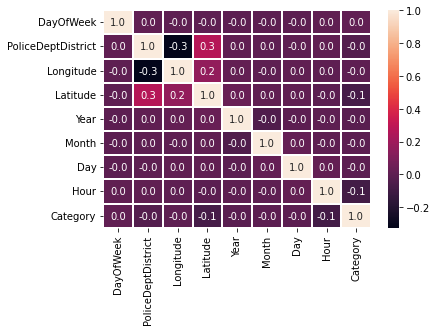

In [ ]:
df_train_corr = df_train_corr.rename(columns={'Category_Map':'Category'})
sns.heatmap(df_train_corr.corr(), annot=True, fmt=".1f", linewidths=.2)

From the heatmap we see that feature columns dont have correlation with the target column at all. This makes it difficult to decide which features to select for model building, but since we know that we need to predict crime based on location and time we consider the above features.

# MODEL BUILDING

In [ ]:
y.shape

(654719, 1)

In [ ]:
df_train_scaled.shape

(654719, 8)

In [ ]:
y

,Category
0,WARRANTS
3,LARCENY/THEFT
4,LARCENY/THEFT
5,LARCENY/THEFT
6,VEHICLE THEFT
...,...
878044,ROBBERY
878045,LARCENY/THEFT
878046,LARCENY/THEFT
878047,VANDALISM


In [ ]:
df_train_scaled

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour
0,1.000000,0.444444,0.590099,0.595198,1.0,0.363636,0.400000,1.0
1,1.000000,0.444444,0.582677,0.829586,1.0,0.363636,0.400000,1.0
2,1.000000,0.555556,0.503713,0.567923,1.0,0.363636,0.400000,1.0
3,1.000000,0.222222,0.742342,0.049526,1.0,0.363636,0.400000,1.0
4,1.000000,0.222222,0.607346,0.153966,1.0,0.363636,0.400000,1.0
...,...,...,...,...,...,...,...,...
654714,0.166667,0.888889,0.367231,0.055107,0.0,0.000000,0.166667,0.0
654715,0.166667,0.222222,0.445706,0.214713,0.0,0.000000,0.166667,0.0
654716,0.166667,0.777778,0.741414,0.645752,0.0,0.000000,0.166667,0.0
654717,0.166667,0.777778,0.827888,0.648799,0.0,0.000000,0.166667,0.0


In [ ]:
y.reset_index(drop=True, inplace=True)
df_train_cleaned = pd.concat((df_train_scaled, y), 1) #concat normalised data frame with target column

In [ ]:
df_train_cleaned.head()

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Category
0,1.0,0.444444,0.590099,0.595198,1.0,0.363636,0.4,1.0,WARRANTS
1,1.0,0.444444,0.582677,0.829586,1.0,0.363636,0.4,1.0,LARCENY/THEFT
2,1.0,0.555556,0.503713,0.567923,1.0,0.363636,0.4,1.0,LARCENY/THEFT
3,1.0,0.222222,0.742342,0.049526,1.0,0.363636,0.4,1.0,LARCENY/THEFT
4,1.0,0.222222,0.607346,0.153966,1.0,0.363636,0.4,1.0,VEHICLE THEFT


In [ ]:
df_train_cleaned.describe().T

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train_cleaned.shape

(654719, 9)

Since our dataset is has 600k odd records, the RAM was full and crashing during model fitting, hence have taken a smaller sample of the dataset to train models.
We have used random sampling specifying a fraction of 50% of data.

In [ ]:
df_train_sample = df_train_cleaned.sample(frac=0.50)
df_train_sample

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Category
38832,0.666667,0.333333,0.631926,0.510017,0.916667,0.727273,0.100000,0.304348,SECONDARY CODES
551514,0.833333,0.777778,0.707584,0.675230,0.083333,0.818182,0.833333,0.782609,LARCENY/THEFT
221447,0.833333,0.222222,0.591218,0.148457,0.666667,0.181818,0.700000,0.869565,ROBBERY
585786,0.666667,1.000000,0.685248,0.695911,0.083333,0.181818,0.566667,1.000000,WARRANTS
217159,0.666667,0.777778,0.720362,0.688549,0.666667,0.272727,0.666667,0.869565,LARCENY/THEFT
...,...,...,...,...,...,...,...,...,...
428861,0.000000,0.555556,0.500993,0.652738,0.333333,0.090909,0.266667,0.608696,BURGLARY
51920,1.000000,0.777778,0.712880,0.680756,0.916667,0.454545,0.333333,0.826087,LARCENY/THEFT
345976,0.666667,0.666667,0.310375,0.659670,0.416667,0.727273,0.566667,0.347826,ASSAULT
34427,0.666667,1.000000,0.674093,0.651466,0.916667,0.818182,0.033333,0.565217,WEAPON LAWS


In [ ]:
df_train_sample.shape

(327360, 9)

In [ ]:
#selecting features
feature_cols = ['DayOfWeek','PoliceDeptDistrict','Longitude','Latitude','Year','Month','Day','Hour']
X_sample = df_train_sample[feature_colums]
X_sample.shape

(327360, 8)

In [ ]:
#Selecting target column
y_sample = df_train_sample[['Category']]
y_sample.shape

(327360, 1)

In [ ]:
X_sample

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour
38832,0.666667,0.333333,0.631926,0.510017,0.916667,0.727273,0.100000,0.304348
551514,0.833333,0.777778,0.707584,0.675230,0.083333,0.818182,0.833333,0.782609
221447,0.833333,0.222222,0.591218,0.148457,0.666667,0.181818,0.700000,0.869565
585786,0.666667,1.000000,0.685248,0.695911,0.083333,0.181818,0.566667,1.000000
217159,0.666667,0.777778,0.720362,0.688549,0.666667,0.272727,0.666667,0.869565
...,...,...,...,...,...,...,...,...
428861,0.000000,0.555556,0.500993,0.652738,0.333333,0.090909,0.266667,0.608696
51920,1.000000,0.777778,0.712880,0.680756,0.916667,0.454545,0.333333,0.826087
345976,0.666667,0.666667,0.310375,0.659670,0.416667,0.727273,0.566667,0.347826
34427,0.666667,1.000000,0.674093,0.651466,0.916667,0.818182,0.033333,0.565217


In [ ]:
y_sample

,Category
38832,SECONDARY CODES
551514,LARCENY/THEFT
221447,ROBBERY
585786,WARRANTS
217159,LARCENY/THEFT
...,...
428861,BURGLARY
51920,LARCENY/THEFT
345976,ASSAULT
34427,WEAPON LAWS


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3) #70-30 split; 70% used for train and 30% for test

In [ ]:
print(f"Shape of X_Train: {X_train.shape}\nShape of y_Train: {y_train.shape}\nShape of X_Test: {X_test.shape}\nShape of y_test: {y_test.shape}")

Shape of X_Train: (229152, 8)
Shape of y_Train: (229152, 1)
Shape of X_Test: (98208, 8)
Shape of y_test: (98208, 1)


**Analysis on which ML Model to pick:**

Since our dataset is a multiclass problem, we are trying to predict the category of crime, its a classification problem, can use Knn, Decision Tree classifier, Random Forest Ensemble, Boosting algorithms to see which model performs the best in terms of predictions.

**Evaluation Metric:**
We have used the following evaluation metrics:
- The most appropriate evaluation metric for multi-class problems is the multi-class logarithmic loss. Logarithmic loss measures the performance of a classification model where the prediction output is a probability value between 0 and 1. For each incident, we will predict a set of predicted probabilities (one for every class), and we will calculate the average deviation from the real values.
- Accuracy, Precision, Recall

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.metrics import log_loss

In [ ]:
#since we also predict the probability of occurance of a crime we can use logistic regression
logR = LogisticRegression(random_state=42)
logR.fit(X_train, y_train) #fit model to training data.
preds = logR.predict(X_test) # make predictions on test

results_log = classification_report(y_test, preds)
print(results_log)

logR_loss = log_loss(y_train, logR.predict_proba(X_train))
print("\nLogarithmic loss :", logR_loss)

                    precision    recall  f1-score   support

           ASSAULT       0.17      0.10      0.13     11539
          BURGLARY       0.00      0.00      0.00      5560
DISORDERLY CONDUCT       0.00      0.00      0.00       639
     DRUG/NARCOTIC       0.23      0.04      0.06      8062
               DUI       0.00      0.00      0.00      1017
     FRAUD-FORGERY       0.00      0.00      0.00      3982
     LARCENY/THEFT       0.29      0.92      0.44     26102
     MISCELLANEOUS       0.00      0.00      0.00      1466
    MISSING PERSON       0.00      0.00      0.00      4114
           ROBBERY       0.00      0.00      0.00      3531
   SECONDARY CODES       0.00      0.00      0.00      1500
      SEX OFFENSES       0.00      0.00      0.00      1725
   STOLEN PROPERTY       0.00      0.00      0.00       694
    SUSPICIOUS OCC       0.00      0.00      0.00      4665
          TRESPASS       0.00      0.00      0.00      1063
         VANDALISM       0.00      0.00

Decision tree classiers are suitable for datasets having multiple classes ie multiple categories target, DT can directly classify into each category.
We are using Decision tree classifier to establish a baseline model against which we can measure the performance of other models.

In [ ]:
DTclf = DecisionTreeClassifier()
DTclf.fit(X_train, y_train)
y_pred = DTclf.predict(X_test)

results_log = classification_report(y_test, y_pred)
print(results_log)

DT_loss = log_loss(y_train, DTclf.predict_proba(X_train))
print("\nLogarithmic loss :", DT_loss)

                    precision    recall  f1-score   support

           ASSAULT       0.20      0.21      0.20     11539
          BURGLARY       0.11      0.11      0.11      5560
DISORDERLY CONDUCT       0.06      0.08      0.07       639
     DRUG/NARCOTIC       0.36      0.41      0.38      8062
               DUI       0.02      0.02      0.02      1017
     FRAUD-FORGERY       0.12      0.14      0.13      3982
     LARCENY/THEFT       0.42      0.38      0.40     26102
     MISCELLANEOUS       0.08      0.08      0.08      1466
    MISSING PERSON       0.33      0.35      0.34      4114
           ROBBERY       0.07      0.07      0.07      3531
   SECONDARY CODES       0.02      0.02      0.02      1500
      SEX OFFENSES       0.37      0.39      0.38      1725
   STOLEN PROPERTY       0.02      0.02      0.02       694
    SUSPICIOUS OCC       0.08      0.08      0.08      4665
          TRESPASS       0.05      0.05      0.05      1063
         VANDALISM       0.11      0.11

We achieved an accuracy of 24% and low logarithmic loss of 0.06 from our baseline model.
We can  now train other models like Random Forest, XGBoost, LGBM models. We expect these model to perform better than the baseline.

In [ ]:
Ranforrest = RandomForestClassifier(random_state=42)
Ranforrest.fit(X_train, y_train.values.ravel())
y_predi = Ranforrest.predict(X_test)

results_log = classification_report(y_test, y_predi)
print(results_log)

Rf_loss = log_loss(y_train, Ranforrest.predict_proba(X_train))
print("\nLogarithmic loss :", Rf_loss)

                    precision    recall  f1-score   support

           ASSAULT       0.23      0.23      0.23     11539
          BURGLARY       0.17      0.07      0.10      5560
DISORDERLY CONDUCT       0.12      0.05      0.07       639
     DRUG/NARCOTIC       0.43      0.53      0.48      8062
               DUI       0.04      0.01      0.02      1017
     FRAUD-FORGERY       0.21      0.10      0.13      3982
     LARCENY/THEFT       0.40      0.75      0.52     26102
     MISCELLANEOUS       0.16      0.06      0.08      1466
    MISSING PERSON       0.50      0.36      0.42      4114
           ROBBERY       0.11      0.03      0.05      3531
   SECONDARY CODES       0.03      0.01      0.02      1500
      SEX OFFENSES       0.53      0.49      0.51      1725
   STOLEN PROPERTY       0.03      0.01      0.02       694
    SUSPICIOUS OCC       0.10      0.03      0.05      4665
          TRESPASS       0.09      0.03      0.05      1063
         VANDALISM       0.15      0.07

In [ ]:
y_train_cp = y_train.copy()
y_train_tr = le.fit_transform(y_train_cp)
y_test_cp = y_test.copy()
y_test_tr = le.fit_transform(y_test_cp)

XGB = XGBClassifier(random_state=42)
XGB.fit(X_train, y_train_tr)
y_predict = XGB.predict(X_test)

results_log = classification_report(y_test_tr, y_predict)
print(results_log)

xgb_loss = log_loss(y_train, XGB.predict_proba(X_train))
print("\nLogarithmic loss :", xgb_loss)

              precision    recall  f1-score   support

           0       0.22      0.21      0.21     11561
           1       0.22      0.03      0.05      5447
           2       0.25      0.08      0.12       639
           3       0.40      0.53      0.45      8073
           4       0.12      0.01      0.02       994
           5       0.27      0.07      0.11      4123
           6       0.36      0.83      0.50     25988
           7       0.47      0.05      0.10      1499
           8       0.62      0.30      0.40      4323
           9       0.16      0.01      0.02      3556
          10       0.14      0.01      0.01      1439
          11       0.51      0.48      0.49      1816
          12       0.08      0.00      0.00       686
          13       0.15      0.01      0.01      4736
          14       0.24      0.04      0.06      1088
          15       0.17      0.03      0.05      6625
          16       0.29      0.28      0.29      8078
          17       0.23    

Above model took 8 odd minutes to train and make predictions

In [ ]:
lgbmCl = LGBMClassifier(random_state=42)
lgbmCl.fit(X_train, y_train)
y_predic = lgbmCl.predict(X_test)

results_log = classification_report(y_test, y_predic)
print(results_log)

lgbm_loss = log_loss(y_train, lgbmCl.predict_proba(X_train))
print("\nLogarithmic loss :", lgbm_loss)

                    precision    recall  f1-score   support

           ASSAULT       0.21      0.18      0.19     11539
          BURGLARY       0.22      0.01      0.01      5560
DISORDERLY CONDUCT       0.26      0.06      0.09       639
     DRUG/NARCOTIC       0.39      0.52      0.45      8062
               DUI       0.19      0.01      0.02      1017
     FRAUD-FORGERY       0.30      0.05      0.08      3982
     LARCENY/THEFT       0.34      0.86      0.49     26102
     MISCELLANEOUS       0.53      0.04      0.08      1466
    MISSING PERSON       0.60      0.25      0.35      4114
           ROBBERY       0.16      0.00      0.00      3531
   SECONDARY CODES       0.28      0.00      0.01      1500
      SEX OFFENSES       0.50      0.47      0.48      1725
   STOLEN PROPERTY       0.00      0.00      0.00       694
    SUSPICIOUS OCC       0.10      0.00      0.00      4665
          TRESPASS       0.27      0.04      0.07      1063
         VANDALISM       0.20      0.00

- From all the above Models we trained we see that Random Forest Model performed best compared to others. It has a low logarithemic loss of 0.3 and gave an accuracy of 34%.

- From the evaluation data we are going ahead with Random Forest Classifier to make predictions on Test data(ie evaluate the performance of the model on test data)

- Also we might feel the accuracy doesnt look great for the models, this is because we had multiple classes 19 categories in target and some classes had limited records available in them. Considering the constraints, the prediction accuracy is impressive.

# READING TEST DATA, PREPROCESSING & PREDICTIONS

We perform the same data preprocessing steps for test dataset as we did for train dataset before predicting.

In [ ]:
df_test = pd.read_csv('/content/sample_data/Term_Project_Crime_Classification/test.csv', index_col='Id')
df_test.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [ ]:
df_test.tail()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
884257,2003-01-01 00:01:00,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987
884258,2003-01-01 00:01:00,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681
884259,2003-01-01 00:01:00,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075
884260,2003-01-01 00:01:00,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479
884261,2003-01-01 00:01:00,Wednesday,TARAVAL,1500 Block of SLOAT BL,-122.489714,37.733950


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884262 entries, 0 to 884261
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       884262 non-null  object 
 1   DayOfWeek   884262 non-null  object 
 2   PdDistrict  884262 non-null  object 
 3   Address     884262 non-null  object 
 4   X           884262 non-null  float64
 5   Y           884262 non-null  float64
dtypes: float64(2), object(4)
memory usage: 47.2+ MB


Test dataset consists of 884,262 records and 6 columns with date ranges between 2003 and 2015. Dataset has no missing/null values. There are 4 object columns and 2 numeric columns. Object columns will need encoding.

In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
X,884262.0,-122.422693,0.030985,-122.513642,-122.433069,-122.416517,-122.406959,-120.5
Y,884262.0,37.771476,0.484824,37.707879,37.752374,37.775421,37.784353,90.0


In [ ]:
#Rename columns
df_test = df_test.rename(columns={'PdDistrict': 'PoliceDeptDistrict', 'X':'Longitude', 'Y':'Latitude'})

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884262 entries, 0 to 884261
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Dates               884262 non-null  object 
 1   DayOfWeek           884262 non-null  object 
 2   PoliceDeptDistrict  884262 non-null  object 
 3   Address             884262 non-null  object 
 4   Longitude           884262 non-null  float64
 5   Latitude            884262 non-null  float64
dtypes: float64(2), object(4)
memory usage: 47.2+ MB


**Handling Missing/Null Values**

In [ ]:
df_test.isna().sum()

Dates                 0
DayOfWeek             0
PoliceDeptDistrict    0
Address               0
Longitude             0
Latitude              0
dtype: int64

There are no null/missing values in the test dataset.

**Checking for Duplicates**

In [ ]:
df_test.duplicated().sum()

188352

Test Dataset contains 188352 samples which are duplicates, hence we remove them before going ahead.

In [ ]:
df_test = df_test.drop_duplicates()
df_test.shape

(695910, 6)

In [ ]:
df_test.duplicated().sum()

0

**Detecting Outliers**

<AxesSubplot:>

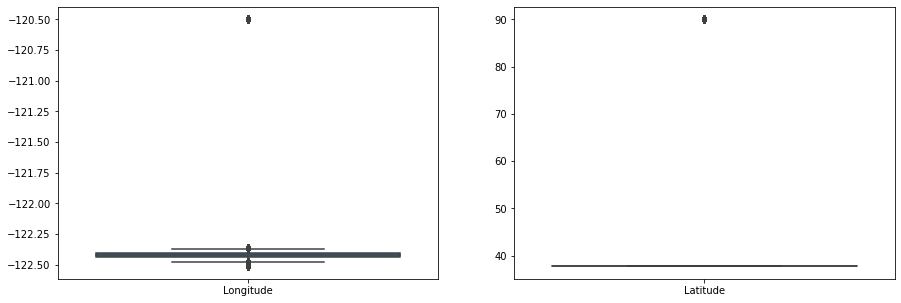

In [ ]:
#Checking for Outliers
figure, axs = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(data = df_test[["Longitude"]],ax=axs[0])
sns.boxplot(data = df_test[["Latitude"]],ax=axs[1])

In [ ]:
#getting outliers count
df_outs = df_test[(df_test["Longitude"] == -120.50) & (df_test["Latitude"] == 90)]
df_outs.shape
#df_outs.head()

(54, 6)

Test dataset like the train dataset contains 54 records containing erreneous outlier co-ordinates. We impute these rows before proceeding.

In [ ]:
#replacing outlier values with the mean co-ordinates of districts they belong to
#Using a simple imputer for this task- we are first replacing co-ordinate values having -120.5 and 90 with NaN and then imputing those values by finding the mean of district they belong to.
from sklearn.impute import SimpleImputer
df_test.replace({'Longitude': -120.5, 'Latitude': 90.0}, np.NaN, inplace=True)

imp = SimpleImputer(strategy='mean')
districts = df_test['PoliceDeptDistrict'].unique()

for district in districts:
    df_test.loc[df_test['PoliceDeptDistrict'] == district, ['Longitude', 'Latitude']] = imp.fit_transform(df_test.loc[df_test['PoliceDeptDistrict'] == district, ['Longitude', 'Latitude']])

In [ ]:
df_outs_rem = df_test[(df_test["Longitude"] == -120.50) & (df_test["Latitude"] == 90)]
df_outs_rem #all outliers imputed.

,Dates,DayOfWeek,PoliceDeptDistrict,Address,Longitude,Latitude
Id,,,,,,


**Drop Unwanted Columns**

In [ ]:
#dropping unwanted columns- Only Address column is not necessary for making predictions on test dataset
df_test = df_test.drop(['Address'], axis=1)
df_test.shape

(695910, 5)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695910 entries, 0 to 884261
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Dates               695910 non-null  object 
 1   DayOfWeek           695910 non-null  object 
 2   PoliceDeptDistrict  695910 non-null  object 
 3   Longitude           695910 non-null  float64
 4   Latitude            695910 non-null  float64
dtypes: float64(2), object(3)
memory usage: 31.9+ MB


**Data Transformations and Feature Extraction**

In [ ]:
type(df_test['Dates'])

pandas.core.series.Series

In [ ]:
#Exploding the Dates column to extract year, month and day
dates = pd.to_datetime(df_test["Dates"])
df_test['Year'] = dates.dt.year
df_test['Month'] = dates.dt.month
df_test['Day'] = dates.dt.day
df_test['Hour'] = dates.dt.hour
df_test['Minute'] = dates.dt.minute
df_test.head()

,Dates,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute
Id,,,,,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,-122.399588,37.735051,2015,5,10,23,59
1,2015-05-10 23:51:00,Sunday,BAYVIEW,-122.391523,37.732432,2015,5,10,23,51
2,2015-05-10 23:50:00,Sunday,NORTHERN,-122.426002,37.792212,2015,5,10,23,50
3,2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412,2015,5,10,23,45
5,2015-05-10 23:40:00,Sunday,TARAVAL,-122.459024,37.713172,2015,5,10,23,40


In [ ]:
def weekend(weekday):
    return weekday == "Saturday" or weekday == "Sunday"

df_test["Weekend"] = df_test["DayOfWeek"].map(weekend)

In [ ]:
df_test[df_test['Weekend']==True]

,Dates,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute,Weekend
Id,,,,,,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,-122.399588,37.735051,2015,5,10,23,59,True
1,2015-05-10 23:51:00,Sunday,BAYVIEW,-122.391523,37.732432,2015,5,10,23,51,True
2,2015-05-10 23:50:00,Sunday,NORTHERN,-122.426002,37.792212,2015,5,10,23,50,True
3,2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412,2015,5,10,23,45,True
5,2015-05-10 23:40:00,Sunday,TARAVAL,-122.459024,37.713172,2015,5,10,23,40,True
...,...,...,...,...,...,...,...,...,...,...,...
882782,2003-01-04 00:30:00,Saturday,MISSION,-122.418222,37.748166,2003,1,4,0,30,True
882784,2003-01-04 00:30:00,Saturday,MISSION,-122.416569,37.755569,2003,1,4,0,30,True
882785,2003-01-04 00:23:00,Saturday,BAYVIEW,-122.392627,37.731618,2003,1,4,0,23,True


In [ ]:
#We can drop the Dates column since we split it into Year-Month-Day-Hour-Min
df_test = df_test.drop(['Dates'], axis=1)
df_test.shape

(695910, 10)

**Feature Encoding of Object Columns**

In [ ]:
#Mapping Days of the week
daynumber = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
df_test['DayOfWeek_enc'] = df_test['DayOfWeek'].map(daynumber)
df_test.head()

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute,Weekend,DayOfWeek_enc
Id,,,,,,,,,,,
0,Sunday,BAYVIEW,-122.399588,37.735051,2015,5,10,23,59,True,7
1,Sunday,BAYVIEW,-122.391523,37.732432,2015,5,10,23,51,True,7
2,Sunday,NORTHERN,-122.426002,37.792212,2015,5,10,23,50,True,7
3,Sunday,INGLESIDE,-122.437394,37.721412,2015,5,10,23,45,True,7
5,Sunday,TARAVAL,-122.459024,37.713172,2015,5,10,23,40,True,7


In [ ]:
#Mapping Police Department Districts
distnumber = {'NORTHERN':1,'PARK':2,'INGLESIDE':3,'BAYVIEW':4,'RICHMOND':5,'CENTRAL':6,'TENDERLOIN':7,'TARAVAL':8,'SOUTHERN':9,'MISSION':10}
df_test['PoliceDeptDistrict_enc'] = df_test['PoliceDeptDistrict'].map(distnumber)
df_test.head()

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute,Weekend,DayOfWeek_enc,PoliceDeptDistrict_enc
Id,,,,,,,,,,,,
0,Sunday,BAYVIEW,-122.399588,37.735051,2015,5,10,23,59,True,7,4
1,Sunday,BAYVIEW,-122.391523,37.732432,2015,5,10,23,51,True,7,4
2,Sunday,NORTHERN,-122.426002,37.792212,2015,5,10,23,50,True,7,1
3,Sunday,INGLESIDE,-122.437394,37.721412,2015,5,10,23,45,True,7,3
5,Sunday,TARAVAL,-122.459024,37.713172,2015,5,10,23,40,True,7,8


In [ ]:
df_test_encoded = df_test.copy()
df_test_encoded.head()

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Minute,Weekend,DayOfWeek_enc,PoliceDeptDistrict_enc
Id,,,,,,,,,,,,
0,Sunday,BAYVIEW,-122.399588,37.735051,2015,5,10,23,59,True,7,4
1,Sunday,BAYVIEW,-122.391523,37.732432,2015,5,10,23,51,True,7,4
2,Sunday,NORTHERN,-122.426002,37.792212,2015,5,10,23,50,True,7,1
3,Sunday,INGLESIDE,-122.437394,37.721412,2015,5,10,23,45,True,7,3
5,Sunday,TARAVAL,-122.459024,37.713172,2015,5,10,23,40,True,7,8


In [ ]:
df_test_encoded.shape

(695910, 12)

**Feature Selection**

In [ ]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695910 entries, 0 to 884261
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DayOfWeek               695910 non-null  object 
 1   PoliceDeptDistrict      695910 non-null  object 
 2   Longitude               695910 non-null  float64
 3   Latitude                695910 non-null  float64
 4   Year                    695910 non-null  int64  
 5   Month                   695910 non-null  int64  
 6   Day                     695910 non-null  int64  
 7   Hour                    695910 non-null  int64  
 8   Minute                  695910 non-null  int64  
 9   Weekend                 695910 non-null  bool   
 10  DayOfWeek_enc           695910 non-null  int64  
 11  PoliceDeptDistrict_enc  695910 non-null  int64  
dtypes: bool(1), float64(2), int64(7), object(2)
memory usage: 64.4+ MB


In [ ]:
#renaming feature column names
df_test_encoded = df_test_encoded.rename(columns={'DayOfWeek': 'DayOfWeek_Str', 'PoliceDeptDistrict':'PoliceDeptDistrict_Str', 'DayOfWeek_enc':'DayOfWeek', 'PoliceDeptDistrict_enc':'PoliceDeptDistrict'})

In [ ]:
test_features = ['DayOfWeek','PoliceDeptDistrict','Longitude','Latitude','Year','Month','Day','Hour']
X = df_test_encoded[test_features]
X.shape

(695910, 8)

In [ ]:
X

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour
Id,,,,,,,,
0,7,4,-122.399588,37.735051,2015,5,10,23
1,7,4,-122.391523,37.732432,2015,5,10,23
2,7,1,-122.426002,37.792212,2015,5,10,23
3,7,3,-122.437394,37.721412,2015,5,10,23
5,7,8,-122.459024,37.713172,2015,5,10,23
...,...,...,...,...,...,...,...,...
884256,3,10,-122.425864,37.766254,2003,1,1,0
884258,3,1,-122.425342,37.792681,2003,1,1,0
884259,3,3,-122.445418,37.712075,2003,1,1,0


**Scaling Features**

In [ ]:
# Normalizing the feature variables - X needs to be scaled
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
df_test_scaled = MinMaxScaler().fit_transform(X)
df_test_scaled = pd.DataFrame(df_test_scaled, columns = list(X))
df_test_scaled

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour
0,1.000000,0.333333,0.766024,0.241011,1.0,0.363636,0.3,1.0
1,1.000000,0.333333,0.820190,0.217784,1.0,0.363636,0.3,1.0
2,1.000000,0.000000,0.588618,0.748023,1.0,0.363636,0.3,1.0
3,1.000000,0.222222,0.512106,0.120036,1.0,0.363636,0.3,1.0
4,1.000000,0.777778,0.366834,0.046947,1.0,0.363636,0.3,1.0
...,...,...,...,...,...,...,...,...
695905,0.333333,1.000000,0.589544,0.517772,0.0,0.000000,0.0,0.0
695906,0.333333,0.000000,0.593048,0.752182,0.0,0.000000,0.0,0.0
695907,0.333333,0.222222,0.458212,0.037216,0.0,0.000000,0.0,0.0
695908,0.333333,0.333333,0.847920,0.280289,0.0,0.000000,0.0,0.0


In [ ]:
df_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,695910.0,0.498648,0.327630,0.0,0.166667,0.500000,0.833333,1.0
PoliceDeptDistrict,695910.0,0.547367,0.341530,0.0,0.222222,0.555556,0.888889,1.0
Longitude,695910.0,0.607490,0.172103,0.0,0.535905,0.649792,0.718319,1.0
Latitude,695910.0,0.525677,0.215375,0.0,0.394510,0.599083,0.680727,1.0
Year,695910.0,0.468726,0.302112,0.0,0.166667,0.416667,0.750000,1.0
Month,695910.0,0.484754,0.315014,0.0,0.181818,0.454545,0.727273,1.0
Day,695910.0,0.488903,0.295596,0.0,0.233333,0.500000,0.733333,1.0
Hour,695910.0,0.583876,0.284249,0.0,0.391304,0.608696,0.826087,1.0


**Predictions**

Here we are predicting the crime category of the test dataset using model trained on Random Forest Classifier previously.

In [ ]:
test_predictions = Ranforrest.predict(df_test_scaled)

**Analysing Predictions**

In [ ]:
df_test_scaled['Predicted_Category'] = test_predictions #Concatenating the predictions to the test dataset
df_test_preds = df_test_scaled
df_test_preds

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Predicted_Category
0,1.000000,0.333333,0.766024,0.241011,1.0,0.363636,0.3,1.0,VEHICLE THEFT
1,1.000000,0.333333,0.820190,0.217784,1.0,0.363636,0.3,1.0,LARCENY/THEFT
2,1.000000,0.000000,0.588618,0.748023,1.0,0.363636,0.3,1.0,LARCENY/THEFT
3,1.000000,0.222222,0.512106,0.120036,1.0,0.363636,0.3,1.0,ASSAULT
4,1.000000,0.777778,0.366834,0.046947,1.0,0.363636,0.3,1.0,LARCENY/THEFT
...,...,...,...,...,...,...,...,...,...
695905,0.333333,1.000000,0.589544,0.517772,0.0,0.000000,0.0,0.0,DRUG/NARCOTIC
695906,0.333333,0.000000,0.593048,0.752182,0.0,0.000000,0.0,0.0,LARCENY/THEFT
695907,0.333333,0.222222,0.458212,0.037216,0.0,0.000000,0.0,0.0,VEHICLE THEFT
695908,0.333333,0.333333,0.847920,0.280289,0.0,0.000000,0.0,0.0,ASSAULT


Concatenate the String version of columns back to final dataset with predicted categories for visualization purpose.

In [ ]:
test_str = ['DayOfWeek_Str','PoliceDeptDistrict_Str','Year','Month','Day','Hour']
test_str_features = df_test_encoded[test_str]
test_str_features.shape

(695910, 6)

In [ ]:
#renaming feature column names
test_str_features = test_str_features.rename(columns={'Year': 'Year_Str', 'Month':'Month_Str', 'Day':'Day_Str', 'Hour':'Hour_Str'})

In [ ]:
test_str_features

,DayOfWeek_Str,PoliceDeptDistrict_Str,Year_Str,Month_Str,Day_Str,Hour_Str
Id,,,,,,
0,Sunday,BAYVIEW,2015,5,10,23
1,Sunday,BAYVIEW,2015,5,10,23
2,Sunday,NORTHERN,2015,5,10,23
3,Sunday,INGLESIDE,2015,5,10,23
5,Sunday,TARAVAL,2015,5,10,23
...,...,...,...,...,...,...
884256,Wednesday,MISSION,2003,1,1,0
884258,Wednesday,NORTHERN,2003,1,1,0
884259,Wednesday,INGLESIDE,2003,1,1,0


In [ ]:
df_test_preds

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Predicted_Category
0,1.000000,0.333333,0.766024,0.241011,1.0,0.363636,0.3,1.0,VEHICLE THEFT
1,1.000000,0.333333,0.820190,0.217784,1.0,0.363636,0.3,1.0,LARCENY/THEFT
2,1.000000,0.000000,0.588618,0.748023,1.0,0.363636,0.3,1.0,LARCENY/THEFT
3,1.000000,0.222222,0.512106,0.120036,1.0,0.363636,0.3,1.0,ASSAULT
4,1.000000,0.777778,0.366834,0.046947,1.0,0.363636,0.3,1.0,LARCENY/THEFT
...,...,...,...,...,...,...,...,...,...
695905,0.333333,1.000000,0.589544,0.517772,0.0,0.000000,0.0,0.0,DRUG/NARCOTIC
695906,0.333333,0.000000,0.593048,0.752182,0.0,0.000000,0.0,0.0,LARCENY/THEFT
695907,0.333333,0.222222,0.458212,0.037216,0.0,0.000000,0.0,0.0,VEHICLE THEFT
695908,0.333333,0.333333,0.847920,0.280289,0.0,0.000000,0.0,0.0,ASSAULT


In [ ]:
test_str_features.reset_index(drop=True, inplace=True)
df_test_final = pd.concat((df_test_preds, test_str_features), 1) #concat this new normalised data frame with target column
df_test_final

,DayOfWeek,PoliceDeptDistrict,Longitude,Latitude,Year,Month,Day,Hour,Predicted_Category,DayOfWeek_Str,PoliceDeptDistrict_Str,Year_Str,Month_Str,Day_Str,Hour_Str
0,1.000000,0.333333,0.766024,0.241011,1.0,0.363636,0.3,1.0,VEHICLE THEFT,Sunday,BAYVIEW,2015,5,10,23
1,1.000000,0.333333,0.820190,0.217784,1.0,0.363636,0.3,1.0,LARCENY/THEFT,Sunday,BAYVIEW,2015,5,10,23
2,1.000000,0.000000,0.588618,0.748023,1.0,0.363636,0.3,1.0,LARCENY/THEFT,Sunday,NORTHERN,2015,5,10,23
3,1.000000,0.222222,0.512106,0.120036,1.0,0.363636,0.3,1.0,ASSAULT,Sunday,INGLESIDE,2015,5,10,23
4,1.000000,0.777778,0.366834,0.046947,1.0,0.363636,0.3,1.0,LARCENY/THEFT,Sunday,TARAVAL,2015,5,10,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695905,0.333333,1.000000,0.589544,0.517772,0.0,0.000000,0.0,0.0,DRUG/NARCOTIC,Wednesday,MISSION,2003,1,1,0
695906,0.333333,0.000000,0.593048,0.752182,0.0,0.000000,0.0,0.0,LARCENY/THEFT,Wednesday,NORTHERN,2003,1,1,0
695907,0.333333,0.222222,0.458212,0.037216,0.0,0.000000,0.0,0.0,VEHICLE THEFT,Wednesday,INGLESIDE,2003,1,1,0
695908,0.333333,0.333333,0.847920,0.280289,0.0,0.000000,0.0,0.0,ASSAULT,Wednesday,BAYVIEW,2003,1,1,0


**Vizualization of Prediction Results**

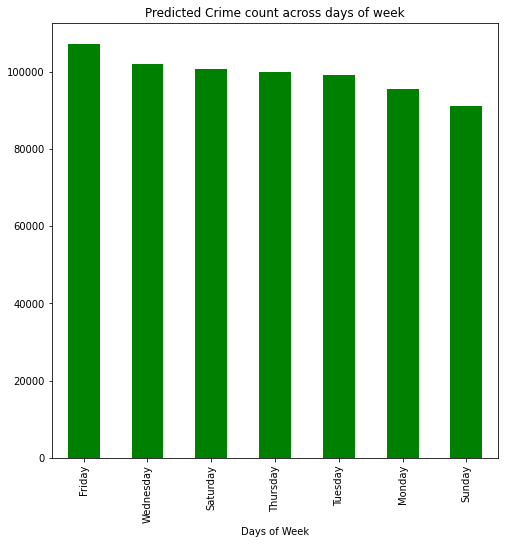

In [ ]:
df_test_final['DayOfWeek_Str'].value_counts().plot(kind='bar', figsize=(8,8), color='green')
plt.title('Predicted Crime count across days of week')
plt.xlabel('Days of Week')
plt.show()

We see from the graph that crime count is maximum on Fridays and minimum on Sundays.

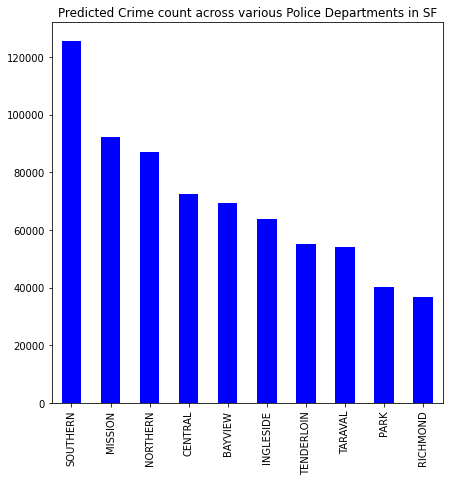

In [ ]:
df_test_final['PoliceDeptDistrict_Str'].value_counts().plot(kind = 'bar',color='blue', figsize = (7,7))
plt.title('Predicted Crime count across various Police Departments in SF')
plt.show()

We see from the above graph that Southern police department district has the maximum number of crimes being reported where as Richmond district has the least number of crimes being reported.

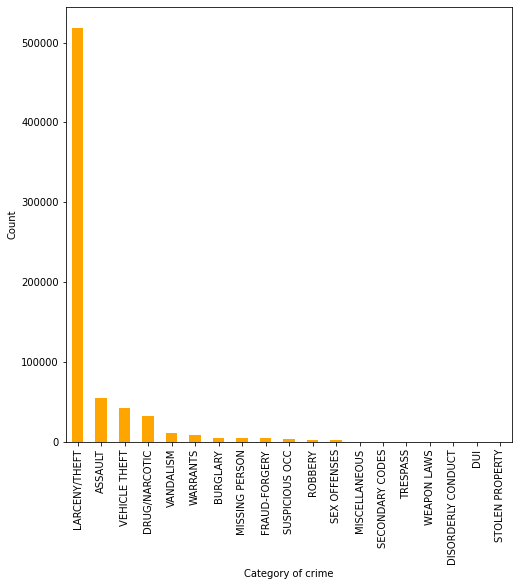

In [ ]:
#Most commonly occuring crimes among all categories of crimes
df_test_final['Predicted_Category'].value_counts().plot(kind='bar', figsize=(8,8), color='orange')
plt.xlabel('Category of crime')
plt.ylabel('Count')
plt.show()

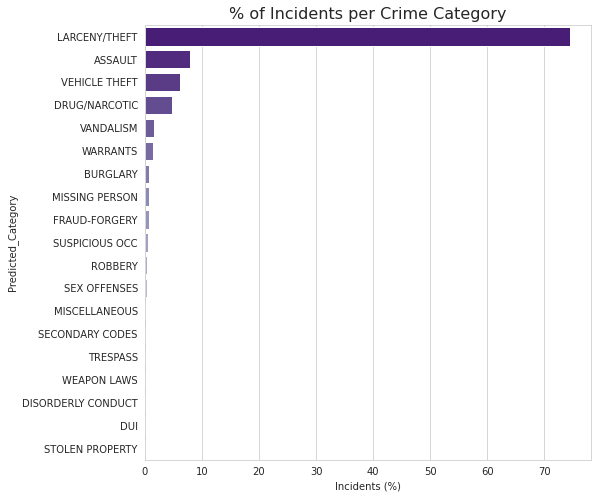

In [ ]:
data = df_test_final.groupby('Predicted_Category').count().iloc[:, 0].sort_values(ascending=False)

plt.figure(figsize=(8, 8))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        (data.values / data.values.sum()) * 100,
        data.index,
        orient='h',
        palette="Purples_r")

plt.title('% of Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

plt.show()

We notice that Theft/Larceny is the top crime committed throughout the years 2003-2015 accounting to almost 75% of total.

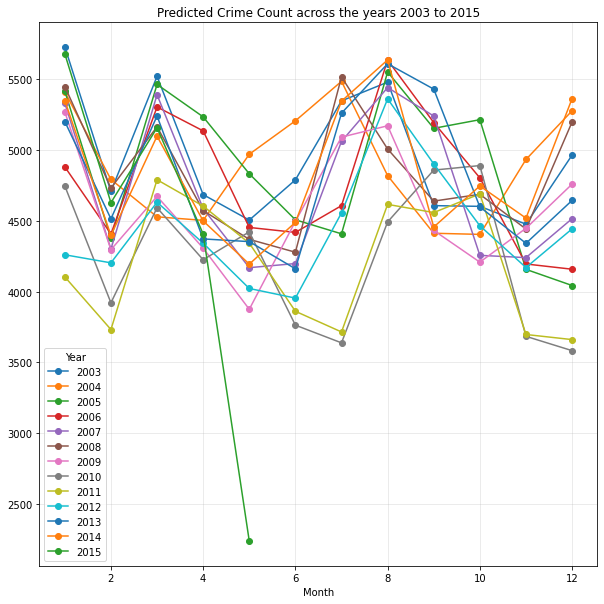

In [ ]:
plot_data = df_test_final.groupby(['Year_Str','Month_Str']).agg({'Predicted_Category':'count'}).pivot_table(index='Month_Str',columns='Year_Str')['Predicted_Category']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
x = plot_data.index
for col in plot_data.columns:
    y = plot_data[col]
    ax.plot(x,y,'o-',label=col)
ax.legend(title='Year')
ax.grid('both',alpha=0.3)
ax.set_title('Predicted Crime Count across the years 2003 to 2015')
ax.set_xlabel('Month')
plt.show()

- We notice a trend where the crime rates across the years are high during the first 3 months and gradually fall during the summer/spring months and raise again during August and eventually fall with a small rise.
- There were lesser crimes on an average in the year 2011.

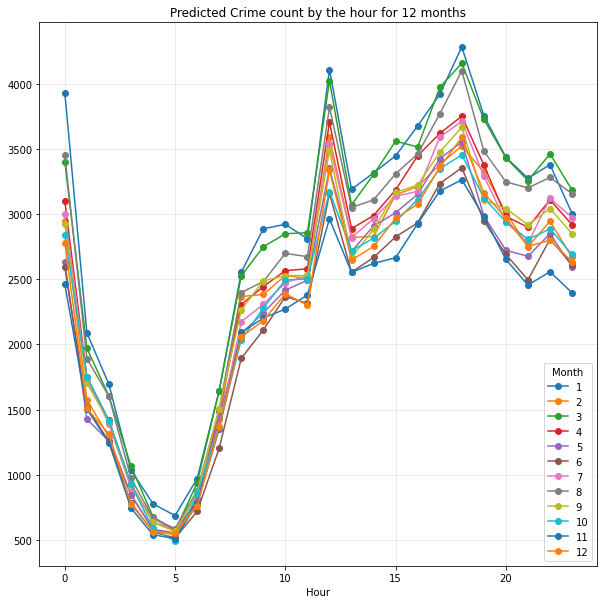

In [ ]:
plot_data = df_test_final.groupby(['Month_Str','Hour_Str']).agg({'Predicted_Category':'count'}).pivot_table(index='Hour_Str',columns='Month_Str')['Predicted_Category']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
x = plot_data.index
for col in plot_data.columns:
    y = plot_data[col]
    ax.plot(x,y,'o-',label=col)
ax.legend(title='Month')
ax.grid('both',alpha=0.3)
ax.set_title('Predicted Crime count by the hour for 12 months')
ax.set_xlabel('Hour')
plt.show()

We notice from that graph that crime rates across the 12 months are higher during mid day and especially peak during noon 12pm and 4pm evening(lunch breaks and office breaks) and crime rates are lower during the early hours(early morning times). They are high at midnight but gradually fall thru the night.

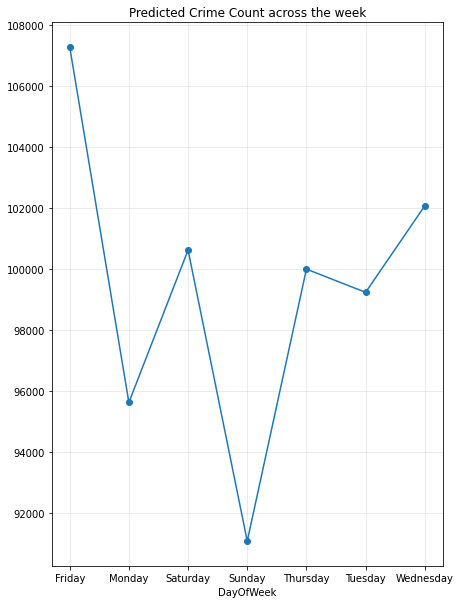

In [ ]:
plot_data = df_test_final.groupby(['DayOfWeek_Str']).agg({'Predicted_Category':'count'})
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot()
x = plot_data.index
for col in plot_data.columns:
    y = plot_data[col]
    ax.plot(x,y,'o-',label=col)
ax.grid('both',alpha=0.3)
ax.set_xlabel('DayOfWeek')
ax.set_title('Predicted Crime Count across the week')
plt.show()

As seen by bar plot before, the above line plot also gives the same insight.